# Waterloo Takeoff Data Source Code

## Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import numpy as np
import math
from sklearn.linear_model import LinearRegression
import matplotlib.colors as mcolors
import time
from scipy.stats import linregress


## File Readings and Dataframe Creation

In [3]:
%%time
# Flights from Apr 16 to May 23
colormap = plt.colormaps['tab20']
subfolders = [f.path for f in os.scandir('data/waterloo/flight/') if f.is_dir()] #Scans Directory
total_subfolders = len(subfolders)

# Stores a csv cols into a list
soh_list1 = []
soh_list2 = []
df_time_list = []
df_kw_list = []
df_alt_list = []
df_soc_list = []
df_oat_list = []
df_pitch_list = []
df_roll_list = []
df_speed_list = []
df_soh_list = []
power_sum = [0,0,0]
time_sum = [0,0,0]

# df_Dtime_list = []
# df_Dkw_list = []
# df_Dalt_list = []
# df_Dsoc_list = []
# df_Doat_list = []
# df_Dpitch_list = []
# df_Droll_list = []
# df_Dspeed_list = []

# Iterates and read each csv
for i, subfolder in enumerate(subfolders):
    csv_files = glob.glob(os.path.join(subfolder, '*.csv'))
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True) #Status Print
    if csv_files:
        # Reads the first csv file in each flight folder
        main_csv = csv_files[0]
        with open(main_csv) as f:
            total_rows = sum(1 for line in f)
        # Skips every 10 rows for efficiency (1 sec iterations estimate)
        skip_rows = [i for i in range(1, total_rows) if i % 10 != 0]
    df_csv = pd.read_csv(main_csv,skiprows=skip_rows)
    df_soh = (df_csv[' bat 1 soh'] + df_csv[' bat 2 soh']) / 2
    df_soh_list.append(df_soh)
    df_time_list.append(df_csv[" time(min)"])
    df_kw_list.append(df_csv[" motor power"])
    df_soc_list.append(df_csv[" bat 1 soc"])
    df_oat_list.append(df_csv[" OAT"])
    df_pitch_list.append(df_csv[" PITCH"])
    df_roll_list.append(df_csv[" ROLL"])
    df_speed_list.append(df_csv[" GROUND_SPEED"])
    
    
    # Calibrates alt to ground alt and converts m to ft
    df_csv[" PRESSURE_ALT"] = (df_csv[" PRESSURE_ALT"]-df_csv[" PRESSURE_ALT"].iloc[-1])*3.28084
    df_csv[" PRESSURE_ALT"] = df_csv[" PRESSURE_ALT"].where(df_csv[" PRESSURE_ALT"]>=0, 0)
    df_alt_list.append(df_csv[" PRESSURE_ALT"])
    
# for i, subfolder in enumerate(derated):
#     csv_files = glob.glob(os.path.join(subfolder, '*.csv'))
#     print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True) #Status Print
#     if csv_files:
#         # Reads the first csv file in each flight folder
#         main_csv = csv_files[0]
#         with open(main_csv) as f:
#             total_rows = sum(1 for line in f)
#         # Skips every 10 rows for efficiency (1 sec iterations estimate)
#         skip_rows = [i for i in range(1, total_rows) if i % 10 != 0]
#     df_Dcsv = pd.read_csv(main_csv,skiprows=skip_rows)
#     df_Dtime_list.append(df_csv[" time(min)"])
#     df_Dkw_list.append(df_csv[" motor power"])
#     df_Dsoc_list.append(df_csv[" bat 1 soc"])
#     df_Doat_list.append(df_csv[" OAT"])
#     df_Dpitch_list.append(df_csv[" PITCH"])
#     df_Droll_list.append(df_csv[" ROLL"])
#     df_Dspeed_list.append(df_csv[" GROUND_SPEED"])
    
#     # Calibrates alt to ground alt and converts m to ft
#     df_Dcsv[" PRESSURE_ALT"] = (df_Dcsv[" PRESSURE_ALT"]-df_Dcsv[" PRESSURE_ALT"].iloc[-1])*3.28084
#     df_Dcsv[" PRESSURE_ALT"] = df_Dcsv[" PRESSURE_ALT"].where(df_Dcsv[" PRESSURE_ALT"]>=0, 0)
#     df_Dalt_list.append(df_csv[" PRESSURE_ALT"])
    
        
    soh_list1.append(df_csv.loc[df_csv[' bat 1 soh'] != 0, ' bat 1 soh'].iloc[0])
    soh_list2.append(df_csv.loc[df_csv[' bat 2 soh'] != 0, ' bat 2 soh'].iloc[0])
df_soh1 = pd.DataFrame({"bat1": soh_list1})
df_soh2 = pd.DataFrame({"bat2": soh_list2})

# df_derated = pd.DataFrame({"time": df_Dtime_list, "kw": df_Dkw_list, "alt": df_Dalt_list, "soc": df_Dsoc_list, "oat": df_Doat_list, "pitch": df_Dpitch_list, "roll": df_Droll_list, "speed": df_Dspeed_list})

# Main df
df_power = pd.DataFrame({"time": df_time_list, "kw": df_kw_list, "alt": df_alt_list, "soc": df_soc_list, "oat": df_oat_list, "pitch": df_pitch_list, "roll": df_roll_list, "speed": df_speed_list, "soh": df_soh_list})

print('') 

Processing file data/waterloo/flight/csv-26897-6263_jun03_0920pm_dc [100%]
CPU times: total: 12.5 s
Wall time: 33.2 s


In [148]:
for i, subfolder in enumerate(subfolders):
    csv_files = glob.glob(os.path.join(subfolder, '*.csv'))
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True) #Status Print
    if csv_files:
        # Reads the first csv file in each flight folder
        main_csv = csv_files[0]
        with open(main_csv) as f:
            total_rows = sum(1 for line in f)
        # Skips every 10 rows for efficiency (1 sec iterations estimat
        df_csv = pd.read_csv(main_csv,skiprows=skip_rows)
        if df_csv.loc[df_csv[' bat 1 soh'] != 0, ' bat 1 soh'].iloc[0]> 90:
            print(i)


Processing file data/waterloo/flight/csv-25019-5907 [12%]9
Processing file data/waterloo/flight/csv-25034-5912 [14%]10
Processing file data/waterloo/flight/csv-25042-5915 [15%]11
Processing file data/waterloo/flight/csv-25048-5918 [16%]12
Processing file data/waterloo/flight/csv-25052-5920 [18%]13
Processing file data/waterloo/flight/csv-25064-5922 [19%]14
Processing file data/waterloo/flight/Derated [100%] [99%]

## Data Visualizations

### Battery SoH

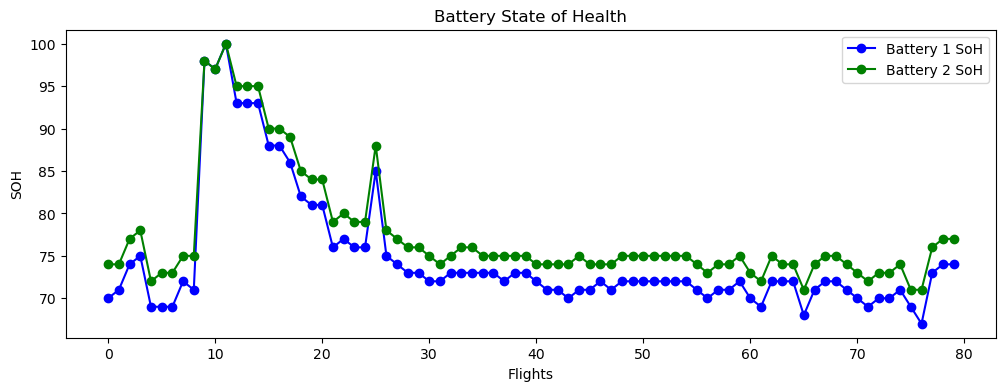

In [140]:
plt.figure(figsize=(12, 4))
plt.plot(df_soh1.index, df_soh1['bat1'], marker='o', color='blue', label='Battery 1 SoH')

# Plot df_soh2
plt.plot(df_soh2.index, df_soh2['bat2'], marker='o', color='green', label='Battery 2 SoH')



# Customize the plot
plt.title('Battery State of Health')
plt.xlabel('Flights')
plt.ylabel('SOH')
plt.legend()
plt.show()

### Altitude Data From All Flights

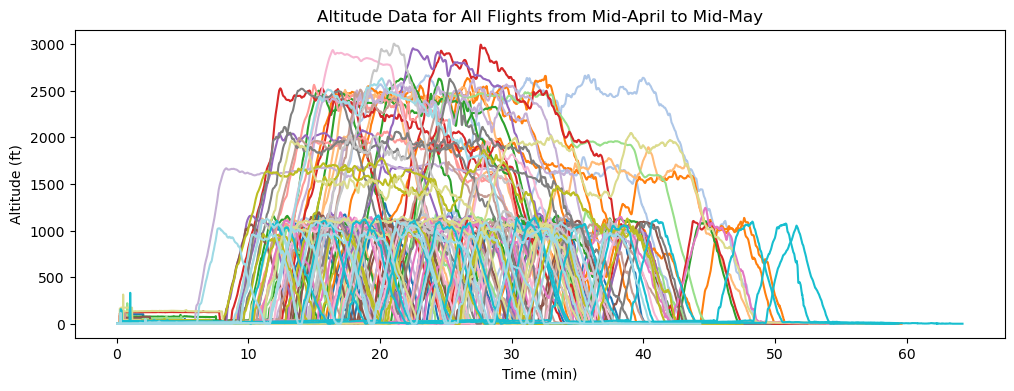

CPU times: total: 109 ms
Wall time: 497 ms


In [49]:
%%time
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))
for i, subfolder in enumerate(subfolders):
    plt.plot(df_power["time"][i], df_power["alt"][i],color=colormap(i / total_subfolders))
    #plt.plot(df_power["kw"][i])

plt.xlabel('Time (min)')
plt.ylabel('Altitude (ft)')
plt.title('Altitude Data for All Flights from Mid-April to Mid-May')
plt.show()

### Circuit-Fitlered Altitude Data

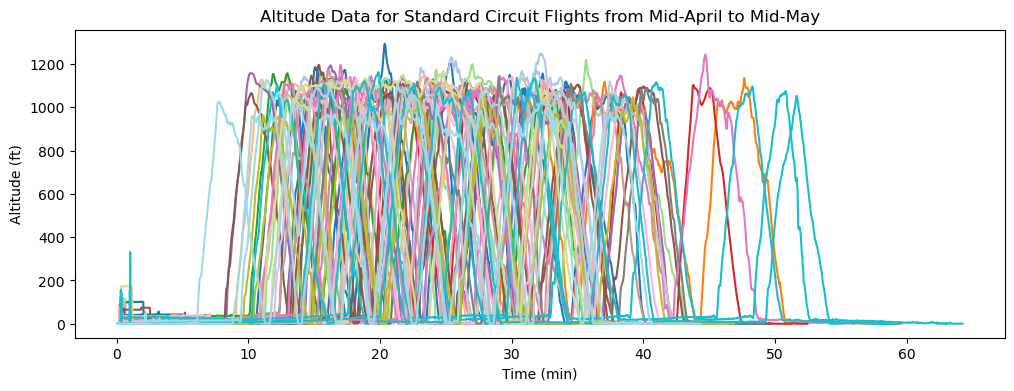

CPU times: total: 125 ms
Wall time: 438 ms


In [50]:
%%time
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))
for i, subfolder in enumerate(subfolders):
    if df_power["alt"][i].max() < 1300:
        plt.plot(df_power["time"][i], df_power["alt"][i],color=colormap(i / total_subfolders))


plt.xlabel('Time (min)')
plt.ylabel('Altitude (ft)')
plt.title('Altitude Data for Standard Circuit Flights from Mid-April to Mid-May')
plt.show()

### Takeoff-Filtered Altitude Data

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Average Slope of Altitude per Time: 627.847 ft/min
Average Slope of Time per Altitude: 0.6 min/300 ft
Plotting...


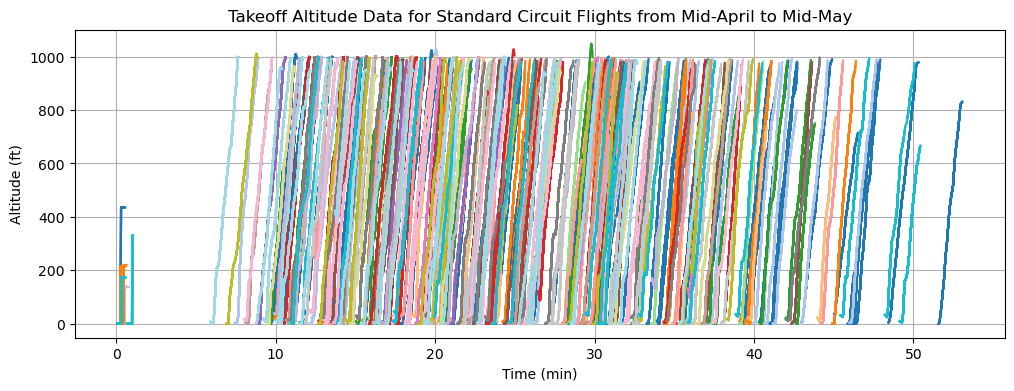

CPU times: total: 33.3 s
Wall time: 1min 20s


In [227]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_ft_per_min = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                # Stops indexing at 1000 when end index is greater than 1000
                
                if df_power["alt"][i][end_idx] > 1000:
                    end_idx = np.argmax(df_power["alt"][i] > 1000)
                
                alt_data = df_power["alt"][i][start_idx:end_idx]
                time_data = df_power["time"][i][start_idx:end_idx]
                plt.plot(time_data, alt_data, color=colormap(i / total_subfolders))

                # Finds average slope
                diff_alt_data = np.diff(alt_data)
                diff_time_data = np.diff(time_data)
                valid_indices = np.where(diff_time_data != 0)[0]
                slope_ft_per_min = diff_alt_data[valid_indices] / diff_time_data[valid_indices]
                slopes_ft_per_min.extend(slope_ft_per_min)

print('')
average_slope_ft_per_min = abs(np.mean(slopes_ft_per_min))
print(f"Average Slope of Altitude per Time: {round(average_slope_ft_per_min,3)} ft/min")
print(f"Average Slope of Time per Altitude: {round(1/average_slope_ft_per_min,3)*300} min/300 ft")
print("Plotting...")
plt.xlabel('Time (min)')
plt.ylabel('Altitude (ft)')
plt.title('Takeoff Altitude Data for Standard Circuit Flights from Mid-April to Mid-May')
plt.grid(True)
plt.show()


Processing file data/waterloo/flight/Derated [100%] [99%]
5690
Average Time per 300 ft: 0.472 min/300 ft
Plotting...


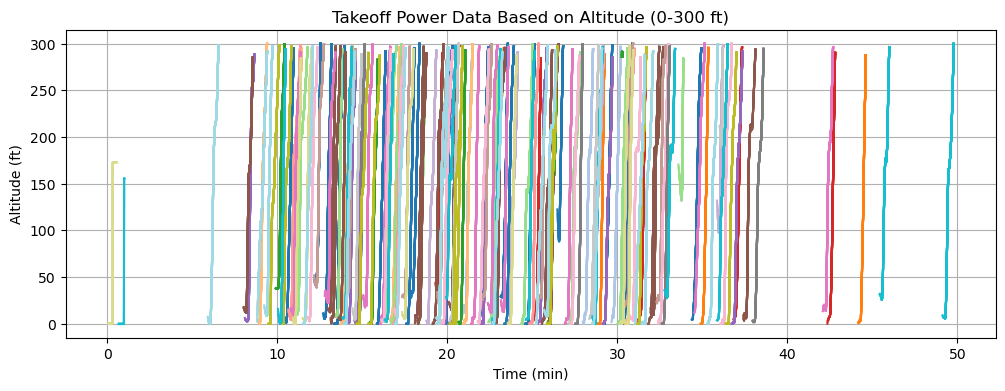

CPU times: total: 6.03 s
Wall time: 13.5 s


In [63]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
slopes_list = []
count = 0
for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 400
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                alt_data = df_power["alt"][i][start_idx:end_idx]
                time_data = df_power["time"][i][start_idx:end_idx]
                plt.plot(time_data, alt_data, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                slopes_list.append(abs((df_power["alt"][i][start_idx]-df_power["alt"][i][end_idx])/(df_power["time"][i][start_idx]-df_power["time"][i][end_idx])))
                count = count + 1

print('')
print(count)
average_slope_soc_per_ft = round(1/(abs(np.mean(slopes_list)))*300,3)
time_sum[0] = average_slope_soc_per_ft
print(f"Average Time per 300 ft: {average_slope_soc_per_ft} min/300 ft")
print("Plotting...")
plt.ylabel('Altitude (ft)')
plt.xlabel('Time (min)')
plt.title('Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()


Processing file data/waterloo/flight/Derated [100%] [99%]
Average Time per 300 ft: 0.461 min/300 ft
Plotting...


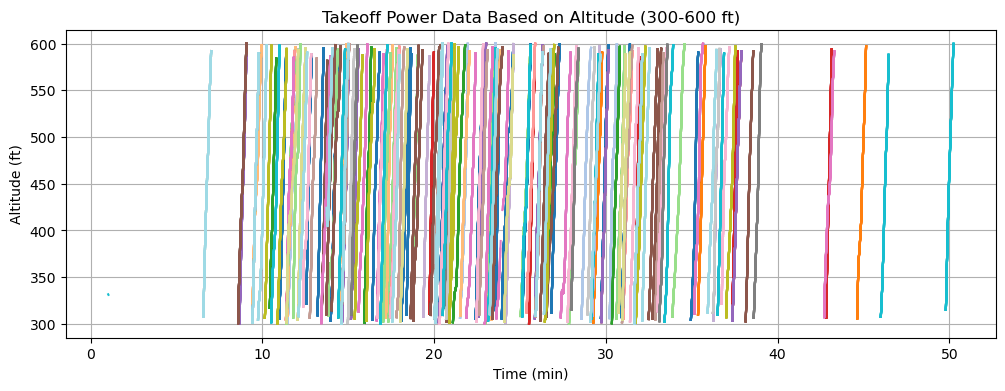

CPU times: total: 11.5 s
Wall time: 17.1 s


In [106]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
slopes_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 300:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 600:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                alt_data = df_power["alt"][i][start_idx:end_idx]
                time_data = df_power["time"][i][start_idx:end_idx]
                plt.plot(time_data, alt_data, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                slopes_list.append(abs((df_power["alt"][i][start_idx]-df_power["alt"][i][end_idx])/(df_power["time"][i][start_idx]-df_power["time"][i][end_idx])))

print('')
average_slope_soc_per_ft = round(1/(abs(np.mean(slopes_list)))*300,3)
time_sum[1] = average_slope_soc_per_ft
print(f"Average Time per 300 ft: {average_slope_soc_per_ft} min/300 ft")
print("Plotting...")
plt.ylabel('Altitude (ft)')
plt.xlabel('Time (min)')
plt.title('Takeoff Power Data Based on Altitude (300-600 ft)')
plt.grid(True)
plt.show()


Processing file data/waterloo/flight/Derated [100%] [99%]
Average Time per 300 ft: 0.472 min/300 ft
Plotting...


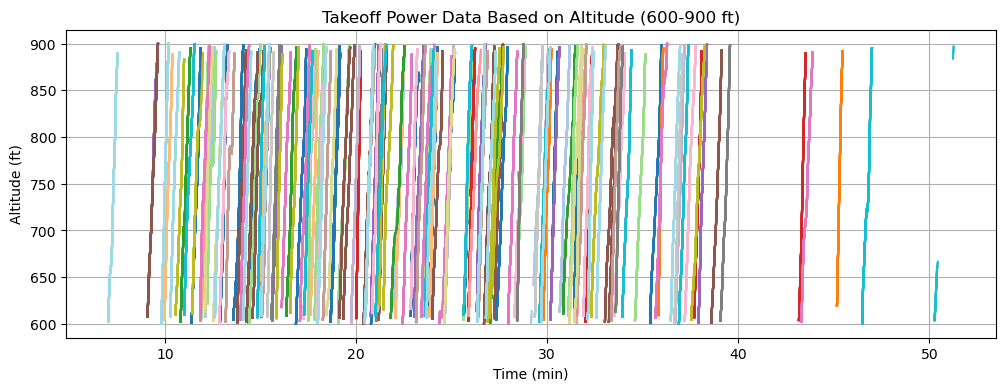

CPU times: total: 11.1 s
Wall time: 17.8 s


In [107]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
slopes_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 600:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 900:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                alt_data = df_power["alt"][i][start_idx:end_idx]
                time_data = df_power["time"][i][start_idx:end_idx]
                plt.plot(time_data, alt_data, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                slopes_list.append(abs((df_power["alt"][i][start_idx]-df_power["alt"][i][end_idx])/(df_power["time"][i][start_idx]-df_power["time"][i][end_idx])))

print('')
average_slope_soc_per_ft = round(1/(abs(np.mean(slopes_list)))*300,3)
time_sum[2] = average_slope_soc_per_ft
print(f"Average Time per 300 ft: {average_slope_soc_per_ft} min/300 ft")
print("Plotting...")
plt.ylabel('Altitude (ft)')
plt.xlabel('Time (min)')
plt.title('Takeoff Power Data Based on Altitude (600-900 ft)')
plt.grid(True)
plt.show()


### Takeoff Power Data

Processing file data/waterloo/flight/csv-26391-6375 [100%]
Plotting...


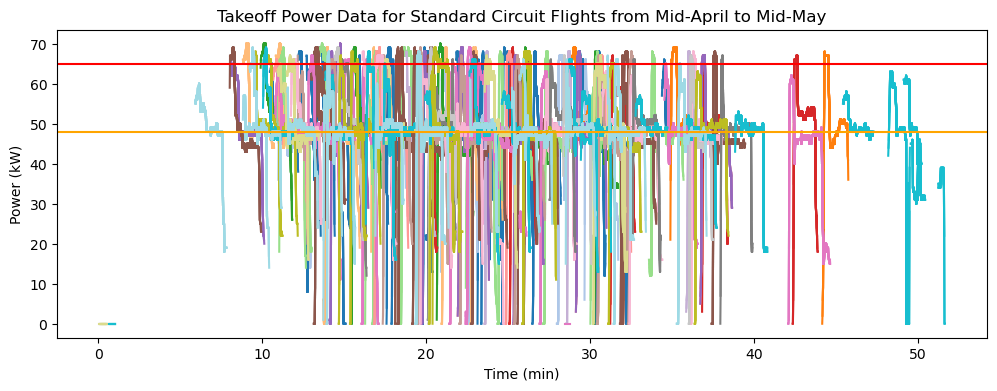

CPU times: total: 16.8 s
Wall time: 21.4 s


In [55]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
    
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                time_data = df_power["time"][i][start_idx:end_idx]
                alt_data = df_power["kw"][i][start_idx:end_idx]
                plt.plot(time_data, alt_data, color=colormap(i / total_subfolders))

print('')
print("Plotting...")

plt.axhline(y=65, color='r')
plt.axhline(y=48, color='orange')
plt.xlabel('Time (min)')
plt.ylabel('Power (kW)')
plt.title('Takeoff Power Data for Standard Circuit Flights from Mid-April to Mid-May')
plt.show()


Processing file data/waterloo/flight/csv-26391-6375 [100%]
Plotting...


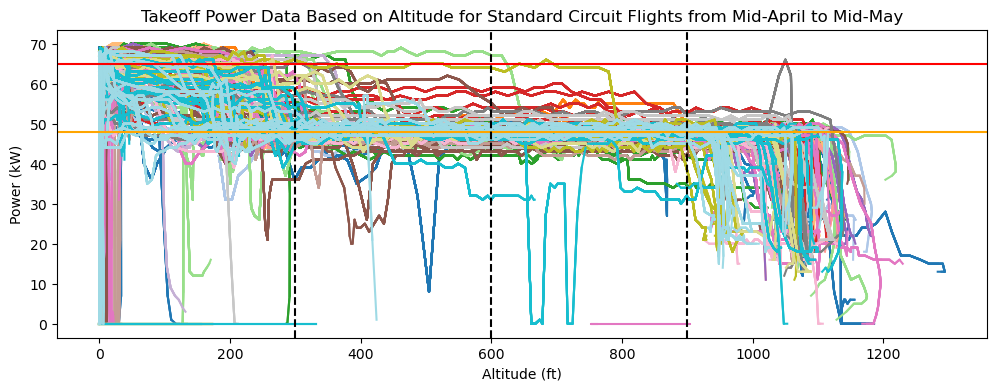

CPU times: total: 9.12 s
Wall time: 27.6 s


In [56]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
    
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                time_data = df_power["alt"][i][start_idx:end_idx]
                alt_data = df_power["kw"][i][start_idx:end_idx]
                plt.plot(time_data, alt_data, color=colormap(i / total_subfolders))

print('')
print("Plotting...")

plt.axhline(y=65, color='r')
plt.axhline(y=48, color='orange')
plt.axvline(x=300, color='black', linestyle='--')
plt.axvline(x=600, color='black', linestyle='--')
plt.axvline(x=900, color='black', linestyle='--')
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('Takeoff Power Data Based on Altitude for Standard Circuit Flights from Mid-April to Mid-May')
plt.show()


Processing file data/waterloo/flight/Derated [100%] [99%]
Average Time per 300 ft: nan kW
Plotting...


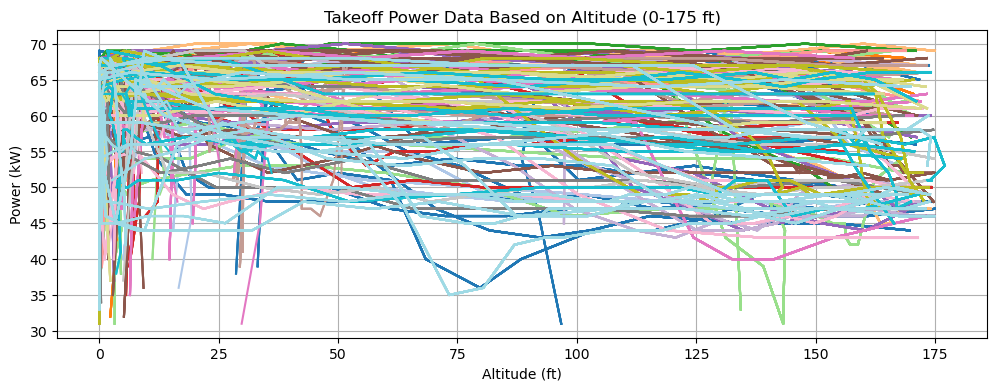

CPU times: total: 7.5 s
Wall time: 13.8 s


In [52]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []


for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 175:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
            
                alt_data = df_power["alt"][i][start_idx:end_idx]
                pwr_data = df_power["kw"][i][start_idx:end_idx]
                filtered_pwr = df_power["kw"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>30]
                filtered_alt = df_power["alt"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>30]
                plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                
                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                power_list.append(filtered_pwr.mean())
print('')
average_power = round((abs(np.mean(power_list))),3)
print(f"Average Time per 300 ft: {round((average_power),3)} kW")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('Takeoff Power Data Based on Altitude (0-175 ft)')
plt.grid(True)
plt.show()


Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Time per 300 ft: 52.141 kW
Plotting...


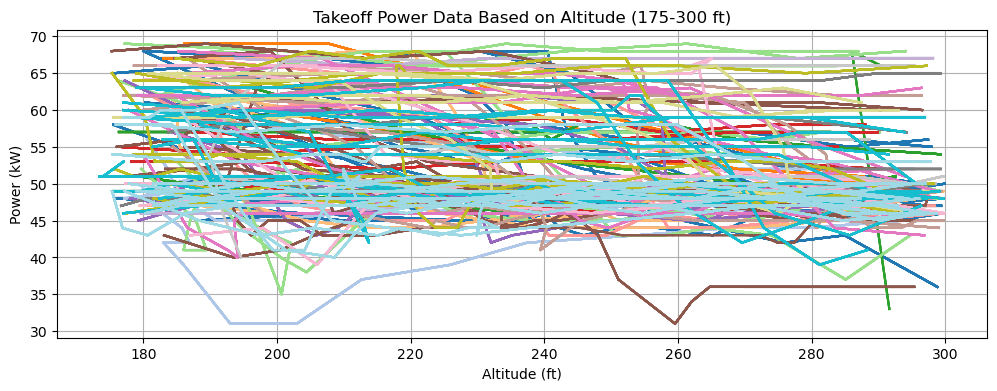

CPU times: total: 8.09 s
Wall time: 19 s


In [58]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 175:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                alt_data = df_power["alt"][i][start_idx:end_idx]
                pwr_data = df_power["kw"][i][start_idx:end_idx]
                filtered_pwr = df_power["kw"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>30]
                filtered_alt = df_power["alt"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>30]
                plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                
                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                power_list.append(filtered_pwr.mean())
print('')
average_power = round((abs(np.mean(power_list))),3)
print(f"Average Time per 300 ft: {round((average_power),3)} kW")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('Takeoff Power Data Based on Altitude (175-300 ft)')
plt.grid(True)
plt.show()


Processing file data/waterloo/flight/Derated [100%] [99%]
Average Time per 300 ft: 53.312 min
Plotting...


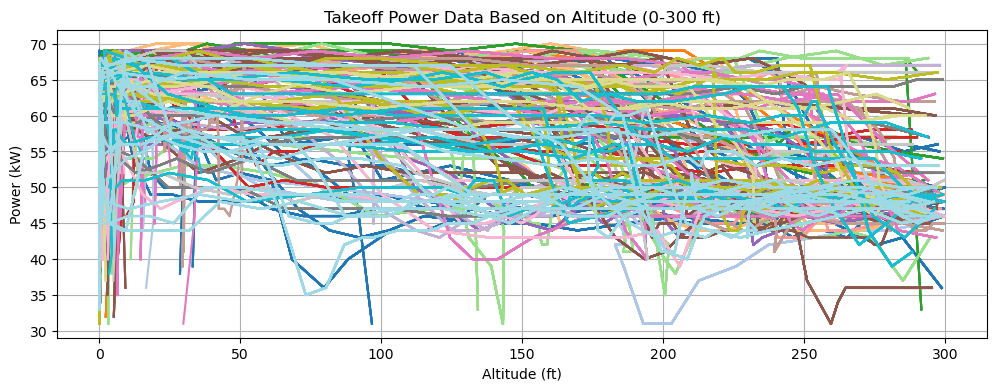

CPU times: total: 8.31 s
Wall time: 19 s


In [103]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                filtered_pwr = df_power["kw"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>30]
                filtered_alt = df_power["alt"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>30]
                
                plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                power_list.append(df_power["kw"][i][start_idx:end_idx].mean())
print('')
average_power = round((abs(np.mean(power_list))),3)
power_sum[0] = average_power
print(f"Average Time per 300 ft: {round((average_power),3)} min")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/Derated [100%] [99%]
Average Power: 48.508 kW
Plotting...


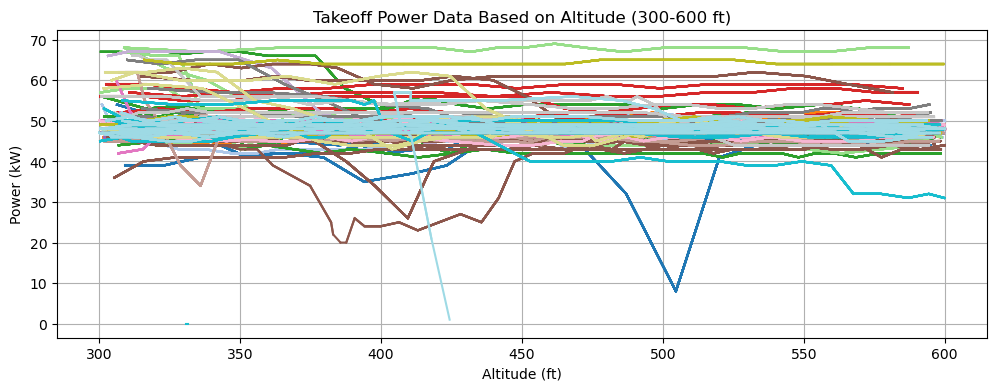

CPU times: total: 6.2 s
Wall time: 18.4 s


In [102]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 300:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 600:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                alt_data = df_power["alt"][i][start_idx:end_idx]
                pwr_data = df_power["kw"][i][start_idx:end_idx]
                plt.plot(alt_data, pwr_data, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                power_list.append(df_power["kw"][i][start_idx:end_idx].mean())
print('')
average_power = round((abs(np.mean(power_list))),3)
power_sum[1] = average_power
print(f"Average Power: {round((average_power),3)} kW")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('Takeoff Power Data Based on Altitude (300-600 ft)')
plt.grid(True)
plt.show()


Processing file data/waterloo/flight/csv-24758-5821 [1%]

Processing file data/waterloo/flight/Derated [100%] [99%]
Average Power: 47.725 kW
Plotting...


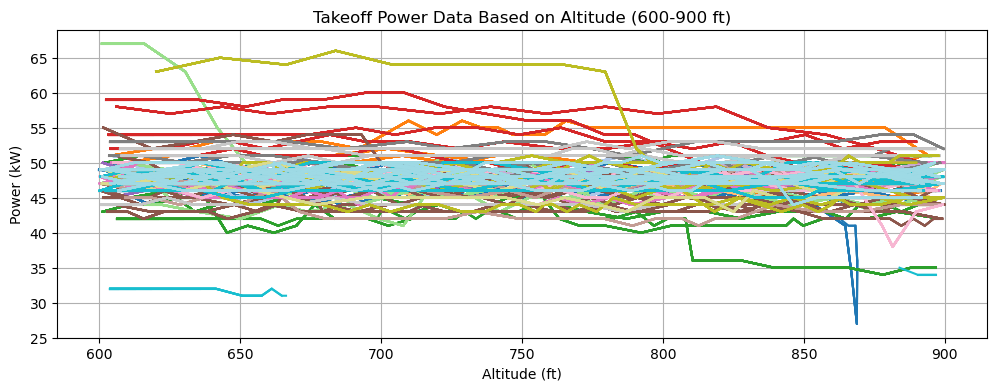

CPU times: total: 8.02 s
Wall time: 23.9 s


In [104]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 600:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 900:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                
                filtered_pwr = df_power["kw"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>10]
                filtered_alt = df_power["alt"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>10]
                plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                power_list.append(df_power["kw"][i][start_idx:end_idx].mean())
print('')
average_power = round((abs(np.mean(power_list))),3)
power_sum[2] = average_power
print(f"Average Power: {round((average_power),3)} kW")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('Takeoff Power Data Based on Altitude (600-900 ft)')
plt.grid(True)
plt.show()


#### Power Seperated by OAT

Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Power (OAT > 20°): 55.112 kW
Average Power (17.5°-20°): 53.689 kW
Average Power (15°-17.5°): 53.917 kW
Average Power (OAT < 15°): 54.791 kW
Plotting...


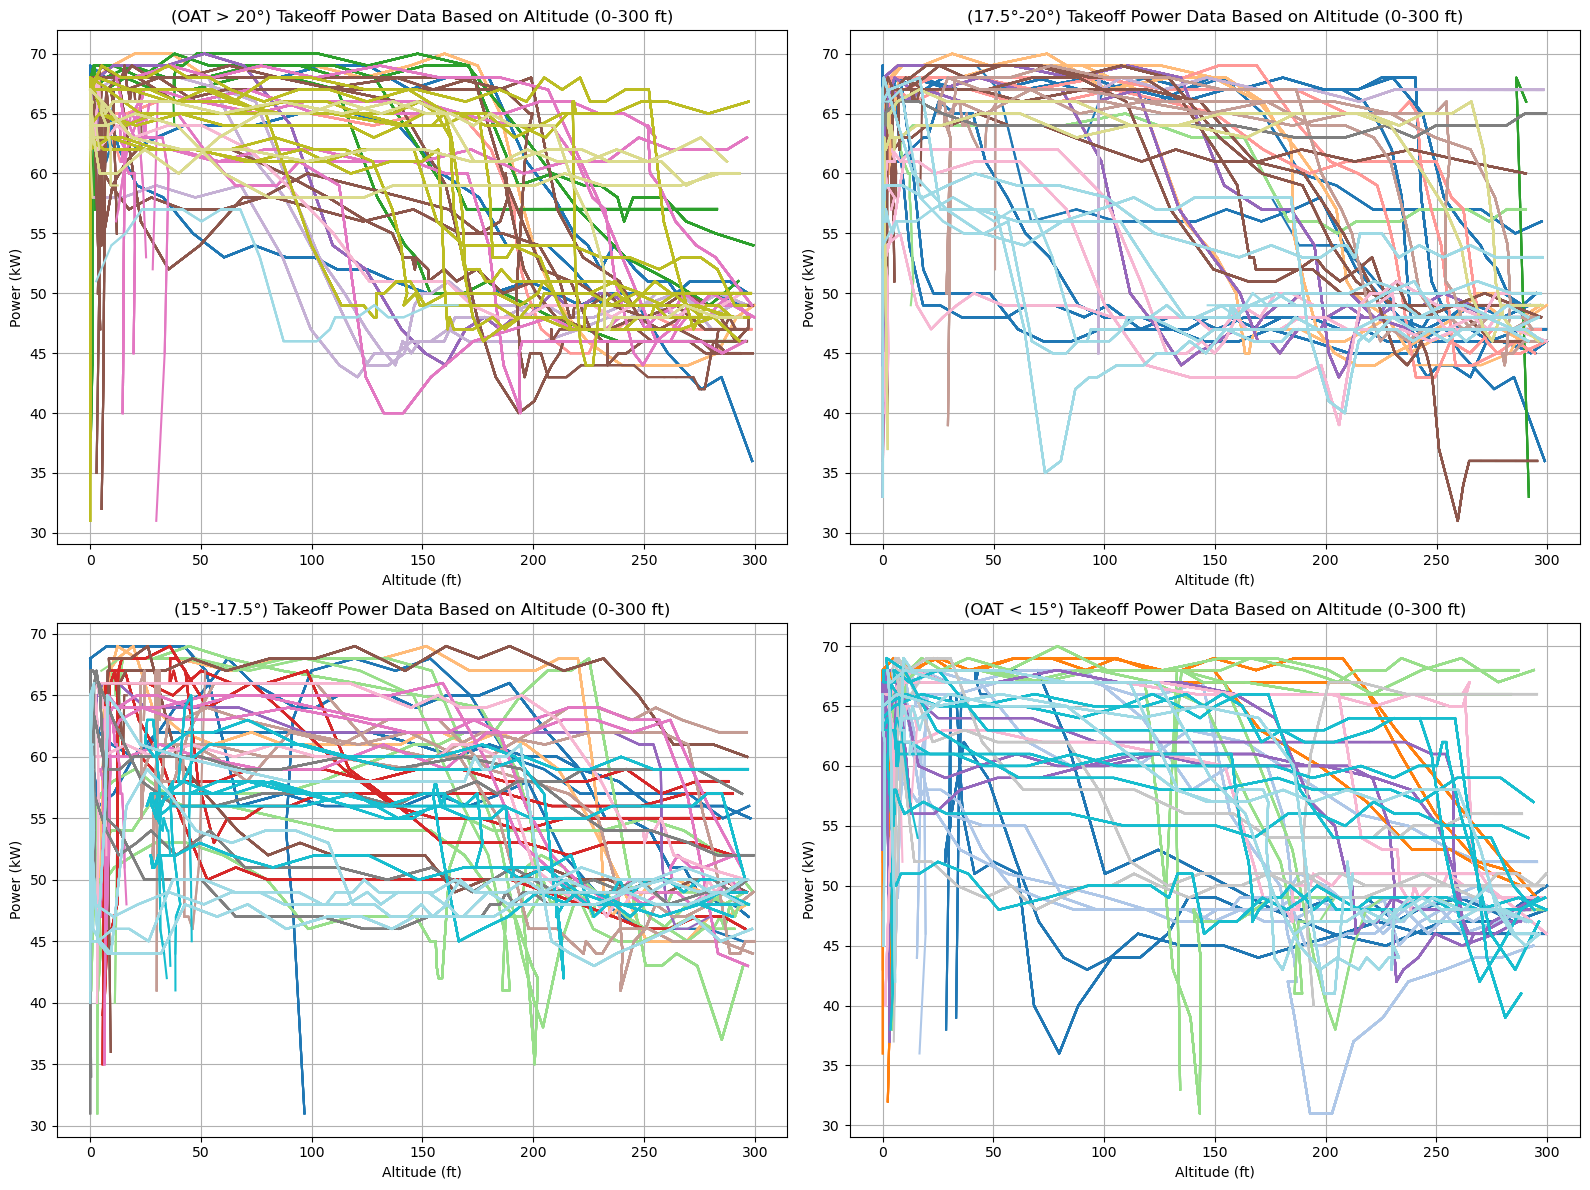

CPU times: total: 10.3 s
Wall time: 22.2 s


In [62]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']

slopes_soc_per_ft = []
power_list_1 = []
power_list_2 = []
power_list_3 = []
power_list_4 = []
powers = [0,0,0,0]
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
(ax1, ax2), (ax3, ax4) = axes

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush=True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index

        if not high_slope_indices.empty:
            # Plots the data in between data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)

                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1

                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue

                filtered_pwr = df_power["kw"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx] > 30]
                filtered_alt = df_power["alt"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx] > 30]
                filtered_oat = df_power["oat"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx] > 30]

                mean_oat = np.mean(filtered_oat)
                if mean_oat > 20:
                    ax1.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                    power_list_1.append(filtered_pwr.mean())
                elif 17.5 <= mean_oat <= 20:
                    ax2.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                    power_list_2.append(filtered_pwr.mean())
                elif 15 <= mean_oat < 17.5:
                    ax3.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                    power_list_3.append(filtered_pwr.mean())
                elif mean_oat < 15:
                    ax4.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                    power_list_4.append(filtered_pwr.mean())

print('')
average_power_1 = round((abs(np.mean(power_list_1))), 3)
average_power_2 = round((abs(np.mean(power_list_2))), 3)
average_power_3 = round((abs(np.mean(power_list_3))), 3)
average_power_4 = round((abs(np.mean(power_list_4))), 3)
powers[0] = average_power_1
powers[1] = average_power_2
powers[2] = average_power_3
powers[3] = average_power_4

print(f"Average Power (OAT > 20°): {average_power_1} kW")
print(f"Average Power (17.5°-20°): {average_power_2} kW")
print(f"Average Power (15°-17.5°): {average_power_3} kW")
print(f"Average Power (OAT < 15°): {average_power_4} kW")
print("Plotting...")

# Configure the subplots
ax1.set_xlabel('Altitude (ft)')
ax1.set_ylabel('Power (kW)')
ax1.set_title('(OAT > 20°) Takeoff Power Data Based on Altitude (0-300 ft)')
ax1.grid(True)

ax2.set_xlabel('Altitude (ft)')
ax2.set_ylabel('Power (kW)')
ax2.set_title('(17.5°-20°) Takeoff Power Data Based on Altitude (0-300 ft)')
ax2.grid(True)

ax3.set_xlabel('Altitude (ft)')
ax3.set_ylabel('Power (kW)')
ax3.set_title('(15°-17.5°) Takeoff Power Data Based on Altitude (0-300 ft)')
ax3.grid(True)

ax4.set_xlabel('Altitude (ft)')
ax4.set_ylabel('Power (kW)')
ax4.set_title('(OAT < 15°) Takeoff Power Data Based on Altitude (0-300 ft)')
ax4.grid(True)

plt.tight_layout()
plt.show()

### Takeoff SoC Data

Processing file data/waterloo/flight/csv-26391-6375 [100%]
Plotting...


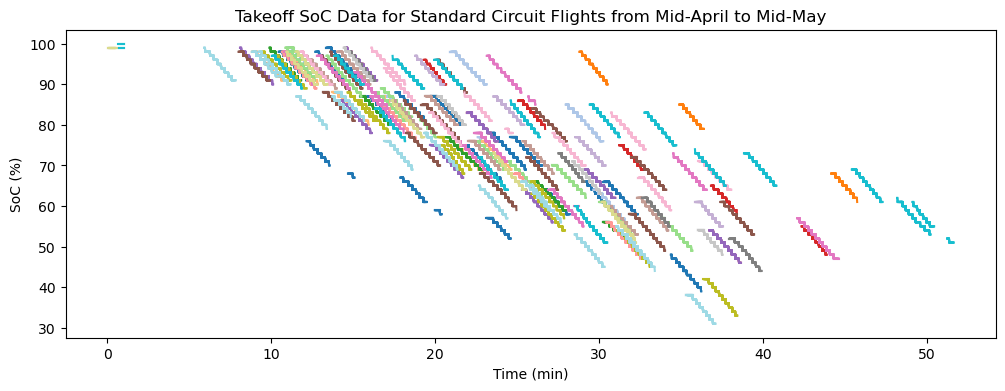

CPU times: total: 6.67 s
Wall time: 26.8 s


In [63]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
    
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                time_data = df_power["time"][i][start_idx:end_idx]
                alt_data = df_power["soc"][i][start_idx:end_idx]
                plt.plot(time_data, alt_data, color=colormap(i / total_subfolders))

print('')
print("Plotting...")
plt.xlabel('Time (min)')
plt.ylabel('SoC (%)')
plt.title('Takeoff SoC Data for Standard Circuit Flights from Mid-April to Mid-May')
plt.show()


Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Slope of SoC per Altitude: 9.049%/1000 ft
Plotting...


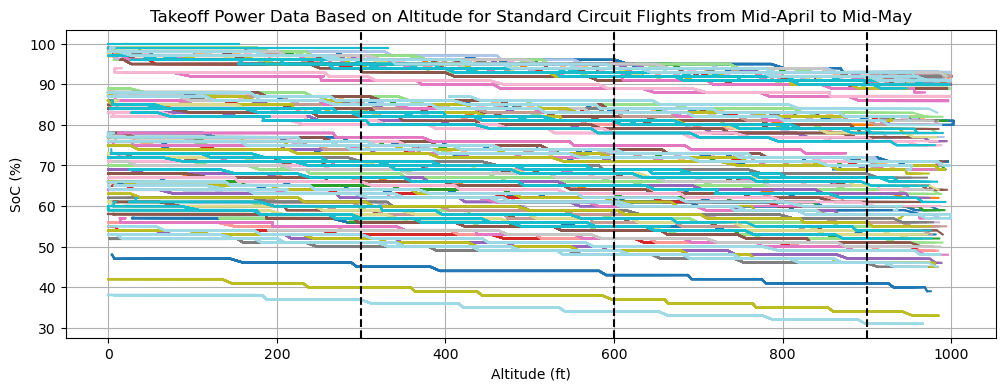

[]
CPU times: total: 13 s
Wall time: 27 s


In [64]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
slopes_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                if df_power["alt"][i][end_idx] > 1000:
                    end_idx = np.argmax(df_power["alt"][i] > 1000)
                alt_data = df_power["alt"][i][start_idx:end_idx]
                soc_data = df_power["soc"][i][start_idx:end_idx]
                plt.plot(alt_data, soc_data, color=colormap(i / total_subfolders))

                diff_soc_data = np.diff(soc_data)
                diff_alt_data = np.diff(alt_data)
                valid_indices = np.where(diff_alt_data != 0)[0]
                slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                slopes_soc_per_ft.extend(slope_soc_per_ft)
               
                

print('')
average_slope_soc_per_ft = abs(np.mean(slopes_soc_per_ft))*1000
print(f"Average Slope of SoC per Altitude: {round(average_slope_soc_per_ft,3)}%/1000 ft")
print("Plotting...")
plt.axvline(x=300, color='black', linestyle='--')
plt.axvline(x=600, color='black', linestyle='--')
plt.axvline(x=900, color='black', linestyle='--')
plt.xlabel('Altitude (ft)')
plt.ylabel('SoC (%)')
plt.title('Takeoff Power Data Based on Altitude for Standard Circuit Flights from Mid-April to Mid-May')
plt.grid(True)
plt.show()
print(slopes_list)


Processing file data/waterloo/flight/csv-26323-6351 [92%]

<timed exec>:46: RuntimeWarning: invalid value encountered in scalar divide


Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Slope of SoC per Altitude: nan%/300 ft
Plotting...


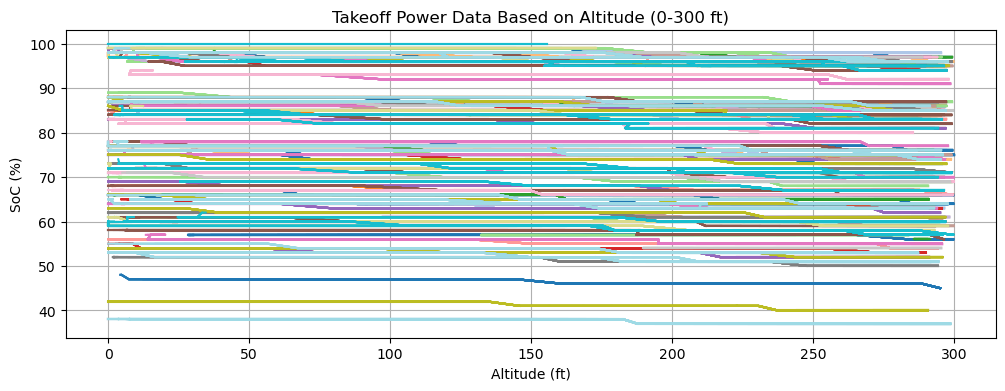

CPU times: total: 9.06 s
Wall time: 13.8 s


In [65]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
slopes_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
                
                alt_data = df_power["alt"][i][start_idx:end_idx]
                soc_data = df_power["soc"][i][start_idx:end_idx]
                plt.plot(alt_data, soc_data, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                slopes_list.append(abs((df_power["soc"][i][start_idx]-df_power["soc"][i][end_idx])/(df_power["alt"][i][start_idx]-df_power["alt"][i][end_idx])))
                
                

print('')
average_slope_soc_per_ft = abs(np.mean(slopes_list))*300 
print(f"Average Slope of SoC per Altitude: {round(average_slope_soc_per_ft,3)}%/300 ft")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('SoC (%)')
plt.title('Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()


Processing file data/waterloo/flight/csv-24758-5821 [1%]

Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Slope of SoC per Altitude: 2.248%/300 ft
Plotting...


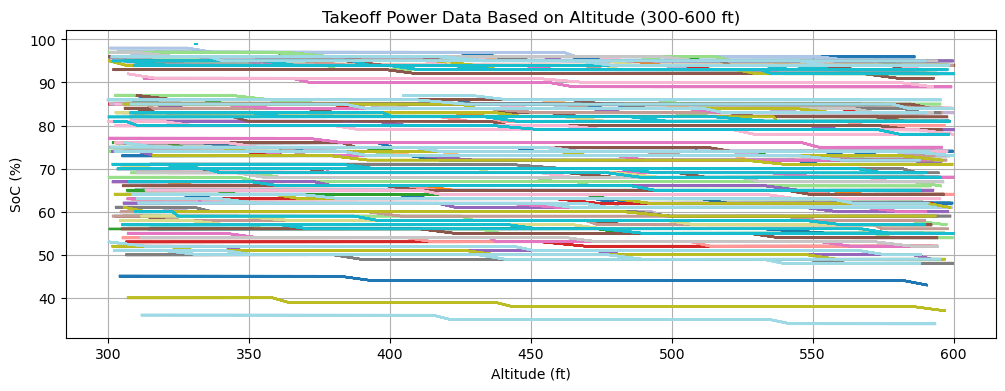

CPU times: total: 10 s
Wall time: 15.7 s


In [66]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
slopes_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 300:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 600:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                alt_data = df_power["alt"][i][start_idx:end_idx]
                soc_data = df_power["soc"][i][start_idx:end_idx]
                plt.plot(alt_data, soc_data, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                slopes_list.append(abs((df_power["soc"][i][start_idx]-df_power["soc"][i][end_idx])/(df_power["alt"][i][start_idx]-df_power["alt"][i][end_idx])))

print('')
average_slope_soc_per_ft = abs(np.mean(slopes_list))*300
print(f"Average Slope of SoC per Altitude: {round(average_slope_soc_per_ft,3)}%/300 ft")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('SoC (%)')
plt.title('Takeoff Power Data Based on Altitude (300-600 ft)')
plt.grid(True)
plt.show()


Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Slope of SoC per Altitude: 2.277%/300 ft
Plotting...


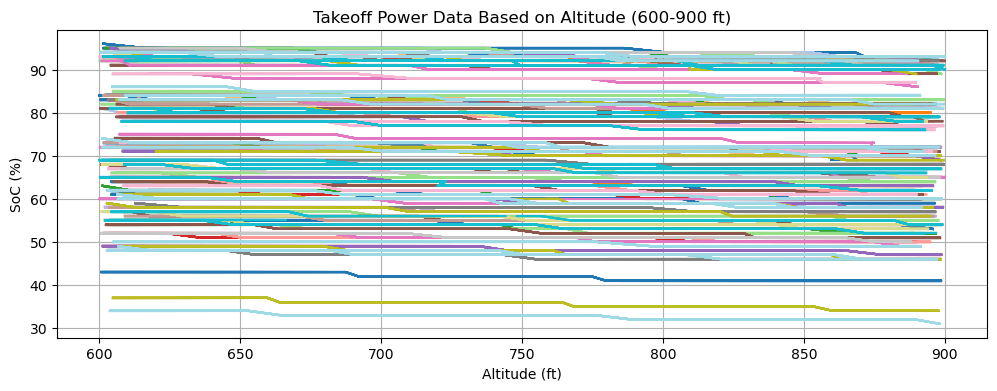

CPU times: total: 9.16 s
Wall time: 16.2 s


In [67]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
slopes_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 100 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 600:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 900:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                alt_data = df_power["alt"][i][start_idx:end_idx]
                soc_data = df_power["soc"][i][start_idx:end_idx]
                plt.plot(alt_data, soc_data, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                slopes_list.append(abs((df_power["soc"][i][start_idx]-df_power["soc"][i][end_idx])/(df_power["alt"][i][start_idx]-df_power["alt"][i][end_idx])))

print('')
average_slope_soc_per_ft = abs(np.mean(slopes_list))*300
print(f"Average Slope of SoC per Altitude: {round(average_slope_soc_per_ft,3)}%/300 ft")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('SoC (%)')
plt.title('Takeoff Power Data Based on Altitude (600-900 ft)')
plt.grid(True)
plt.show()


### Average Total Energy Consumption

In [108]:
time_list = np.array(time_sum)
pwr_list = np.array(power_sum)
kWh_list = time_list*pwr_list/60
total_kWh = round((np.sum(kWh_list)),3)
print(f"Time per 300 ft:{time_list} min")
print(f"Average Power per 300 ft:{pwr_list} kW")
print(f"Divided Energy: {np.round(kWh_list,3)} kWh")
print(f"Total Energy: {total_kWh} kWh")
print(f"dSoC (At 75% SoH): {round((total_kWh/(24.8*0.75))*100,3)}%")

Time per 300 ft:[0.472 0.461 0.472] min
Average Power per 300 ft:[53.312 48.508 47.725] kW
Divided Energy: [0.419 0.373 0.375] kWh
Total Energy: 1.168 kWh
dSoC (At 75% SoH): 6.28%


### Takeoff Roll Data

Processing file data/waterloo/flight/csv-26391-6375 [100%]
Plotting...


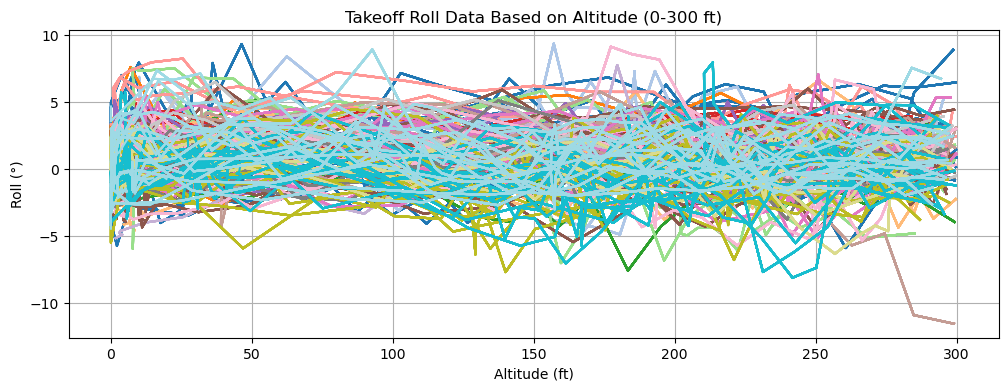

CPU times: total: 12.9 s
Wall time: 17.4 s


In [69]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                filtered_roll = df_power["roll"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>30]
                filtered_alt = df_power["alt"][i][start_idx:end_idx][df_power["kw"][i][start_idx:end_idx]>30]
                
                plt.plot(filtered_alt, filtered_roll, color=colormap(i / total_subfolders))

                # diff_soc_data = np.diff(soc_data)
                # diff_alt_data = np.diff(alt_data)
                # valid_indices = np.where(diff_alt_data != 0)[0]
                # slope_soc_per_ft = diff_soc_data[valid_indices] / diff_alt_data[valid_indices]
                # slopes_soc_per_ft.extend(slope_soc_per_ft)
                
                power_list.append(filtered_pwr.mean())
print('')
average_power = round((abs(np.mean(power_list))),3)
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Roll (°)')
plt.title('Takeoff Roll Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



### Climb Based On Power Setting

#### 0-300 ft

Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Power: 47.204 kW
Average Time per 300 ft: 25.52 s
Average Speed: 108.441 ft/s
Average Pitch: 7.581°
Average Energy: 0.334 kWh
Plotting...


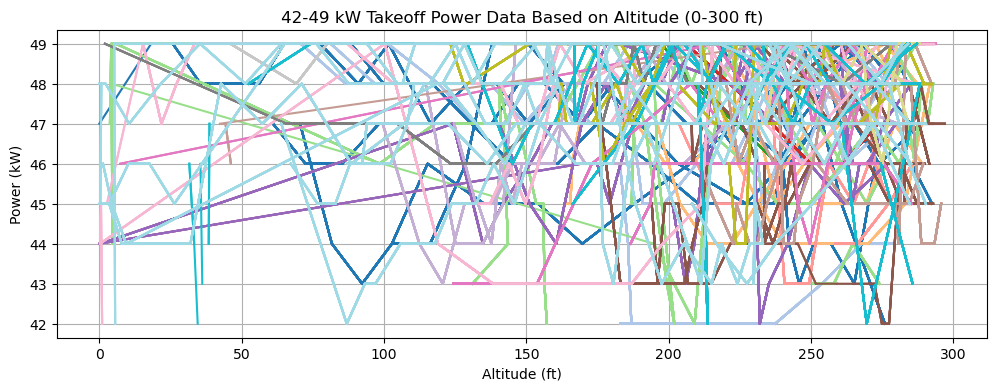

CPU times: total: 19.6 s
Wall time: 21.9 s


In [70]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        
        prev_speed = -1
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
                 
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                # Extract the relevant slice
                pwr_slice = df_power["kw"][i][start_idx:end_idx]

                # Find the indices where the value is between 50 and 60
                in_range_idx = pwr_slice[(pwr_slice >= 42) & (pwr_slice <= 49)].index

                # Update end_idx if values between 50 and 60 are found
                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]  # Include the last index in the range
                
                # Update start_idx to the first value in the range 50 to 60
                    # if df_power["kw"][i][start_idx] < 50 or df_power["kw"][i][start_idx] > 60:
                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 42 or df_power["kw"][i][start_idx] > 49):
                        start_idx += 1

                    # Ensure start_idx is less than end_idx
                    if start_idx < end_idx:
                            
                        
                        # Apply the filtering with the new start_idx and end_idx
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        
                        
                        
                        # THIS IS THE ONLY WORKING FILTER: Further filter the slice to ensure only values between 50 and 60
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 42) & (filtered_pwr <= 49)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]
                        

                        plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                        
                     
                    
                        
                        
                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna = True)  
                        
                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True)*1.688

                            
                            if mean_speed != prev_speed:
                      
                               
                                
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                                
                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna = True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                                    print('nana')
                                else:
                                    if diff_alt != 0:
                                        
                                        diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                        
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time/diff_alt2*300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)
                                                
                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    
                                                    energy_list.append(mean_energy)
                                                    
                                                    # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                                    
                                                    prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('42-49 kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/csv-24758-5821 [1%]

Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Power: 51.185 kW
Average Time per 300 ft: 20.941 s
Average Speed: 105.261 ft/s
Average Pitch: 8.261°
Average Energy: 0.298 kWh
Plotting...


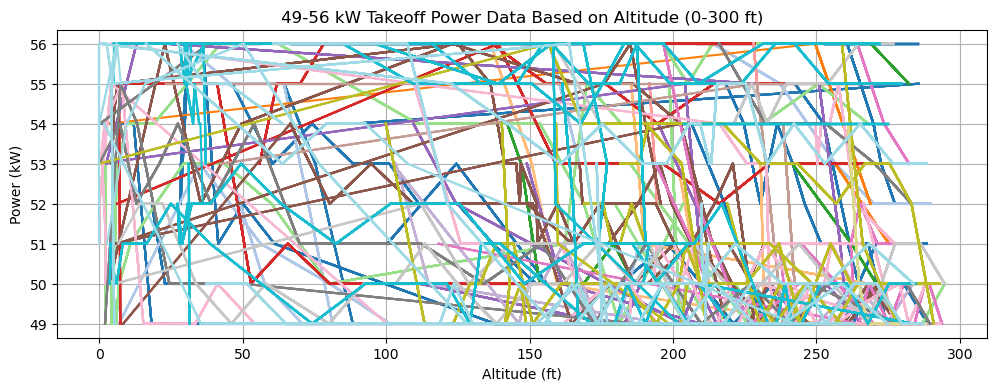

CPU times: total: 18.8 s
Wall time: 21.9 s


In [71]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        
        prev_speed = -1
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
                 
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                # Extract the relevant slice
                pwr_slice = df_power["kw"][i][start_idx:end_idx]

                # Find the indices where the value is between 50 and 60
                in_range_idx = pwr_slice[(pwr_slice >= 49) & (pwr_slice <= 56)].index

                # Update end_idx if values between 50 and 60 are found
                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]  # Include the last index in the range
                
                # Update start_idx to the first value in the range 50 to 60
                    # if df_power["kw"][i][start_idx] < 50 or df_power["kw"][i][start_idx] > 60:
                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 49 or df_power["kw"][i][start_idx] > 56):
                        start_idx += 1

                    # Ensure start_idx is less than end_idx
                    if start_idx < end_idx:
                            
                        
                        # Apply the filtering with the new start_idx and end_idx
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        
                        
                        
                        # THIS IS THE ONLY WORKING FILTER: Further filter the slice to ensure only values between 50 and 60
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 49) & (filtered_pwr <= 56)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]
                        

                        plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                        
                     
                    
                        
                        
                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna = True)  
                        
                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True)*1.688

                            
                            if mean_speed != prev_speed:
                      
                               
                                
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                                
                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna = True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                
                                if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                                    print('nana')
                                else:
                                    if diff_alt != 0:
                                        
                                        diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                        
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time/diff_alt2*300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)
                                                
                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    
                                                    energy_list.append(mean_energy)
                                                    
                                                    # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                                    
                                                    prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('49-56 kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Power: 59.836 kW
Average Time per 300 ft: 26.624 s
Average Speed: 92.015 ft/s
Average Pitch: 10.637°
Average Energy: 0.446 kWh
Plotting...


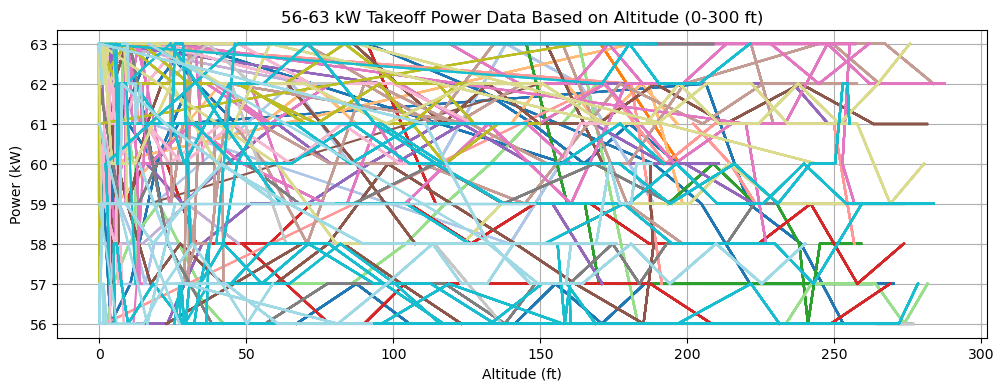

CPU times: total: 9.61 s
Wall time: 19 s


In [72]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        
        prev_speed = -1
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
                 
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                # Extract the relevant slice
                pwr_slice = df_power["kw"][i][start_idx:end_idx]

                # Find the indices where the value is between 50 and 60
                in_range_idx = pwr_slice[(pwr_slice >= 56) & (pwr_slice <= 63)].index

                # Update end_idx if values between 50 and 60 are found
                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]  # Include the last index in the range
                
                # Update start_idx to the first value in the range 50 to 60
                    # if df_power["kw"][i][start_idx] < 50 or df_power["kw"][i][start_idx] > 60:
                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 56 or df_power["kw"][i][start_idx] > 63):
                        start_idx += 1

                    # Ensure start_idx is less than end_idx
                    if start_idx < end_idx:
                            
                        
                        # Apply the filtering with the new start_idx and end_idx
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        
                        
                        
                        # THIS IS THE ONLY WORKING FILTER: Further filter the slice to ensure only values between 50 and 60
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 56) & (filtered_pwr <= 63)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]
                        

                        plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
      
                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna = True)  
                        
                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True)*1.688

                            
                            if mean_speed != prev_speed:
                      
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                                
                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna = True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                
                                if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                                    print('nana')
                                else:
                                    if diff_alt != 0:
                                        
                                        diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                        
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time/diff_alt2*300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)
                                                
                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    
                                                    energy_list.append(mean_energy)
                                                    
                                                    # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                                    
                                                    prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('56-63 kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Power: 66.422 kW
Average Time per 300 ft: 26.644 s
Average Speed: 86.237 ft/s
Average Pitch: 11.789°
Average Energy: 0.471 kWh
Plotting...


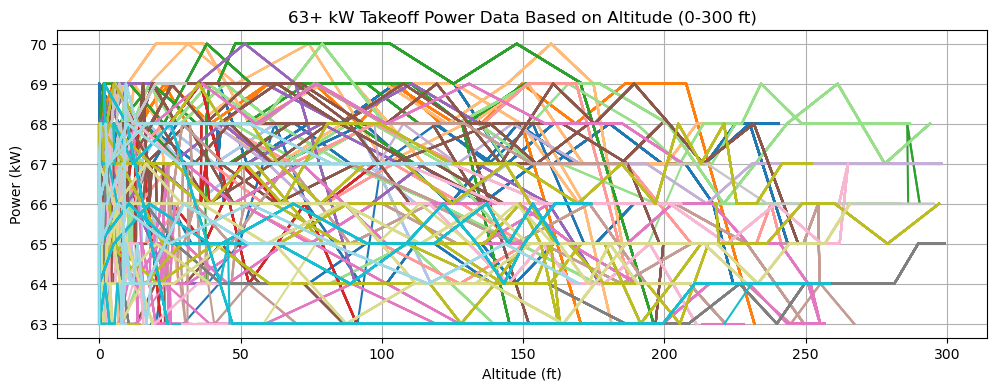

CPU times: total: 9.16 s
Wall time: 21.2 s


In [73]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
speed_list = []
pitch_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
        

                # Extract the relevant slice
                pwr_slice = df_power["kw"][i][start_idx:end_idx]

                # Find the first index where the value exceeds 60
                exceed_idx = pwr_slice[pwr_slice < 63].index

                # Update end_idx if a value greater than 60 is found
                if not exceed_idx.empty:
                    end_idx = exceed_idx[0]

                # Update start_idx if the initial value exceeds 60
                if df_power["kw"][i][start_idx] < 63:
                    start_idx += 1
                    while start_idx < end_idx and df_power["kw"][i][start_idx] > 63:
                        start_idx += 1

                # Apply the filtering with the new start_idx and end_idx
                filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                filtered_alt = df_power["alt"][i][start_idx:end_idx]
                diff_time = df_power["time"][i][end_idx]-df_power["time"][i][start_idx]
                diff_alt = df_power["alt"][i][end_idx]-df_power["alt"][i][start_idx]
                
                
                plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
      
                filtered_roll = df_power["roll"][i][filtered_pwr.index]
                filtered_roll = filtered_roll.loc[filtered_pwr.index]
                mean_roll = filtered_roll.mean(skipna = True)  
                
                if abs(mean_roll) < 5:
                    filtered_speed = df_power["speed"][i][start_idx:end_idx]
                    filtered_speed = filtered_speed.loc[filtered_pwr.index]
                    mean_speed = filtered_speed.mean(skipna=True)*1.688

                    
                    if mean_speed != prev_speed:
                
                        filtered_time = df_power["time"][i][start_idx:end_idx]
                        filtered_time = filtered_time.loc[filtered_pwr.index]
                        diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                        diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                        
                        filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                        filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                        mean_pitch = filtered_pitch.mean(skipna = True)
                        mean_pwr = filtered_pwr.mean(skipna=True)
                        
                
                        if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                            print('nana')
                        else:
                            if diff_alt != 0:
                                
                                diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                
                                if not np.isnan(diff_alt2):
                                    if abs(diff_alt2) != 0:
                                        time_per_alt = diff_time/diff_alt2*300
                                        if not np.isnan(time_per_alt):
                                            time_per_alt_list.append(time_per_alt)
                                            speed_list.append(mean_speed)
                                            pitch_list.append(mean_pitch)
                                            power_list.append(mean_pwr)
                                        
                                            mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                            
                                            energy_list.append(mean_energy)
                                            
                                            # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                            
                                            prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('63+ kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



#### 0-175 ft

Processing file data/waterloo/flight/csv-24762-5823 [2%]

Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Power: 46.847 kW
Average Time per 300 ft: 22.529 s
Average Speed: 106.015 ft/s
Average Pitch: 8.047°
Average Energy: 0.291 kWh
Plotting...


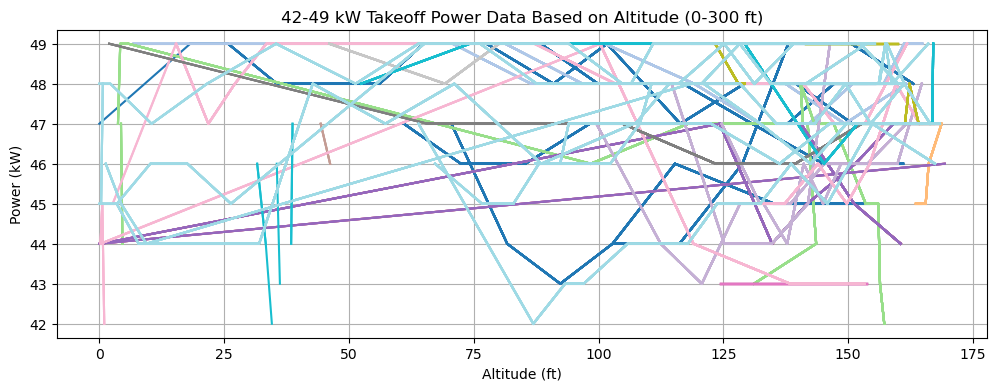

CPU times: total: 2.08 s
Wall time: 11.5 s


In [75]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        
        prev_speed = -1
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
                 
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 175:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                # Extract the relevant slice
                pwr_slice = df_power["kw"][i][start_idx:end_idx]

                # Find the indices where the value is between 50 and 60
                in_range_idx = pwr_slice[(pwr_slice >= 42) & (pwr_slice <= 49)].index

                # Update end_idx if values between 50 and 60 are found
                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]  # Include the last index in the range
                
                # Update start_idx to the first value in the range 50 to 60
                    # if df_power["kw"][i][start_idx] < 50 or df_power["kw"][i][start_idx] > 60:
                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 42 or df_power["kw"][i][start_idx] > 49):
                        start_idx += 1

                    # Ensure start_idx is less than end_idx
                    if start_idx < end_idx:
                            
                        
                        # Apply the filtering with the new start_idx and end_idx
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        
                        
                        
                        # THIS IS THE ONLY WORKING FILTER: Further filter the slice to ensure only values between 50 and 60
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 42) & (filtered_pwr <= 49)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]
                        

                        plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                        
                     
                    
                        
                        
                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna = True)  
                        
                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True)*1.688

                            
                            if mean_speed != prev_speed:
                      
                               
                                
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                                
                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna = True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                                    print('nana')
                                else:
                                    if diff_alt != 0:
                                        
                                        diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                        
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time/diff_alt2*300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)
                                                
                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    
                                                    energy_list.append(mean_energy)
                                                    
                                                    # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                                    
                                                    prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('42-49 kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Power: 52.068 kW
Average Time per 300 ft: 19.811 s
Average Speed: 99.968 ft/s
Average Pitch: 9.0°
Average Energy: 0.287 kWh
Plotting...


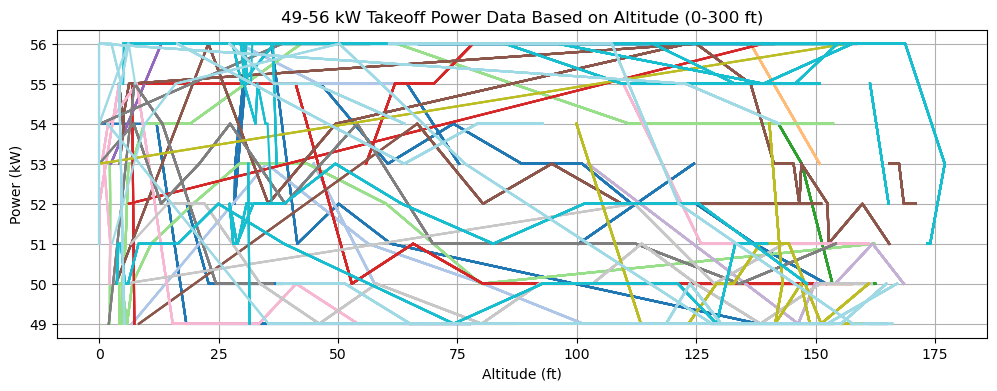

CPU times: total: 2.44 s
Wall time: 12.8 s


In [76]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        
        prev_speed = -1
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
                 
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 175:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                # Extract the relevant slice
                pwr_slice = df_power["kw"][i][start_idx:end_idx]

                # Find the indices where the value is between 50 and 60
                in_range_idx = pwr_slice[(pwr_slice >= 49) & (pwr_slice <= 56)].index

                # Update end_idx if values between 50 and 60 are found
                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]  # Include the last index in the range
                
                # Update start_idx to the first value in the range 50 to 60
                    # if df_power["kw"][i][start_idx] < 50 or df_power["kw"][i][start_idx] > 60:
                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 49 or df_power["kw"][i][start_idx] > 56):
                        start_idx += 1

                    # Ensure start_idx is less than end_idx
                    if start_idx < end_idx:
                            
                        
                        # Apply the filtering with the new start_idx and end_idx
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        
                        
                        
                        # THIS IS THE ONLY WORKING FILTER: Further filter the slice to ensure only values between 50 and 60
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 49) & (filtered_pwr <= 56)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]
                        

                        plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
                        
                     
                    
                        
                        
                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna = True)  
                        
                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True)*1.688

                            
                            if mean_speed != prev_speed:
                      
                               
                                
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                                
                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna = True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                
                                if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                                    print('nana')
                                else:
                                    if diff_alt != 0:
                                        
                                        diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                        
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time/diff_alt2*300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)
                                                
                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    
                                                    energy_list.append(mean_energy)
                                                    
                                                    # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                                    
                                                    prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('49-56 kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Power: 59.98 kW
Average Time per 300 ft: 32.565 s
Average Speed: 89.632 ft/s
Average Pitch: 11.063°
Average Energy: 0.551 kWh
Plotting...


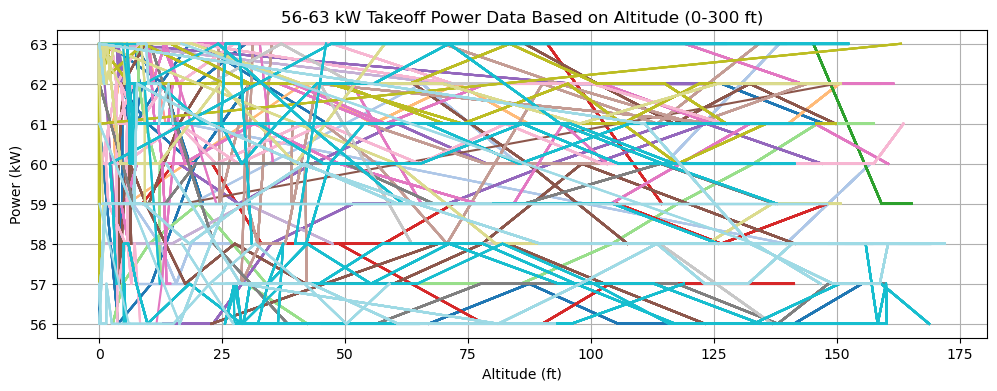

CPU times: total: 2.39 s
Wall time: 16 s


In [77]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        
        prev_speed = -1
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
                 
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 175:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                # Extract the relevant slice
                pwr_slice = df_power["kw"][i][start_idx:end_idx]

                # Find the indices where the value is between 50 and 60
                in_range_idx = pwr_slice[(pwr_slice >= 56) & (pwr_slice <= 63)].index

                # Update end_idx if values between 50 and 60 are found
                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]  # Include the last index in the range
                
                # Update start_idx to the first value in the range 50 to 60
                    # if df_power["kw"][i][start_idx] < 50 or df_power["kw"][i][start_idx] > 60:
                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 56 or df_power["kw"][i][start_idx] > 63):
                        start_idx += 1

                    # Ensure start_idx is less than end_idx
                    if start_idx < end_idx:
                            
                        
                        # Apply the filtering with the new start_idx and end_idx
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        
                        
                        
                        # THIS IS THE ONLY WORKING FILTER: Further filter the slice to ensure only values between 50 and 60
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 56) & (filtered_pwr <= 63)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]
                        

                        plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
      
                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna = True)  
                        
                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True)*1.688

                            
                            if mean_speed != prev_speed:
                      
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                                
                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna = True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                
                                if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                                    print('nana')
                                else:
                                    if diff_alt != 0:
                                        
                                        diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                        
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time/diff_alt2*300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)
                                                
                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    
                                                    energy_list.append(mean_energy)
                                                    
                                                    # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                                    
                                                    prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('56-63 kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/csv-26391-6375 [100%]
Average Power: 66.626 kW
Average Time per 300 ft: 27.654 s
Average Speed: 83.578 ft/s
Average Pitch: 12.473°
Average Energy: 0.522 kWh
Plotting...


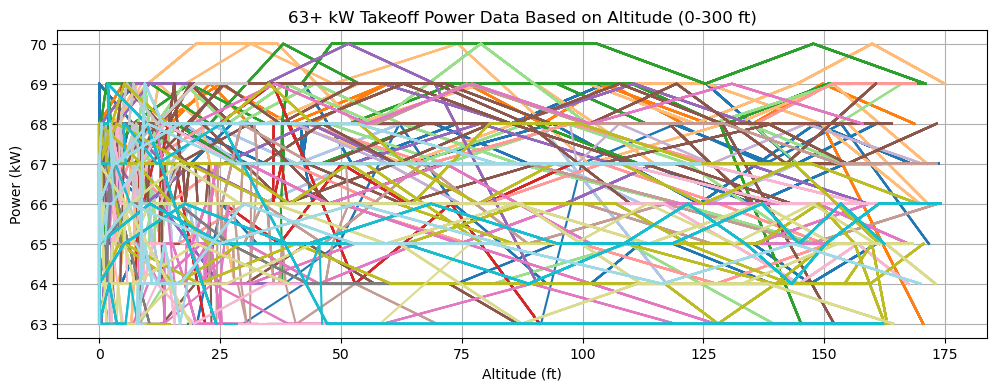

CPU times: total: 3 s
Wall time: 16.7 s


In [78]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
speed_list = []
pitch_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    if df_power["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 175:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
        

                # Extract the relevant slice
                pwr_slice = df_power["kw"][i][start_idx:end_idx]

                # Find the first index where the value exceeds 60
                exceed_idx = pwr_slice[pwr_slice < 63].index

                # Update end_idx if a value greater than 60 is found
                if not exceed_idx.empty:
                    end_idx = exceed_idx[0]

                # Update start_idx if the initial value exceeds 60
                if df_power["kw"][i][start_idx] < 63:
                    start_idx += 1
                    while start_idx < end_idx and df_power["kw"][i][start_idx] > 63:
                        start_idx += 1

                # Apply the filtering with the new start_idx and end_idx
                filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                filtered_alt = df_power["alt"][i][start_idx:end_idx]
                diff_time = df_power["time"][i][end_idx]-df_power["time"][i][start_idx]
                diff_alt = df_power["alt"][i][end_idx]-df_power["alt"][i][start_idx]
                
                
                plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_subfolders))
      
                filtered_roll = df_power["roll"][i][filtered_pwr.index]
                filtered_roll = filtered_roll.loc[filtered_pwr.index]
                mean_roll = filtered_roll.mean(skipna = True)  
                
                if abs(mean_roll) < 5:
                    filtered_speed = df_power["speed"][i][start_idx:end_idx]
                    filtered_speed = filtered_speed.loc[filtered_pwr.index]
                    mean_speed = filtered_speed.mean(skipna=True)*1.688

                    
                    if mean_speed != prev_speed:
                
                        filtered_time = df_power["time"][i][start_idx:end_idx]
                        filtered_time = filtered_time.loc[filtered_pwr.index]
                        diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                        diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                        
                        filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                        filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                        mean_pitch = filtered_pitch.mean(skipna = True)
                        mean_pwr = filtered_pwr.mean(skipna=True)
                        
                
                        if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                            print('nana')
                        else:
                            if diff_alt != 0:
                                
                                diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                
                                if not np.isnan(diff_alt2):
                                    if abs(diff_alt2) != 0:
                                        time_per_alt = diff_time/diff_alt2*300
                                        if not np.isnan(time_per_alt):
                                            time_per_alt_list.append(time_per_alt)
                                            speed_list.append(mean_speed)
                                            pitch_list.append(mean_pitch)
                                            power_list.append(mean_pwr)
                                        
                                            mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                            
                                            energy_list.append(mean_energy)
                                            
                                            # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                            
                                            prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('63+ kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



### Derated Flights

#### 0-300 ft

Processing file data/waterloo/flight/derated/csv-26313-6349 [33%]

Processing file data/waterloo/flight/derated/csv-26330-6353 [100%]
Average Power: 47.267 kW
Average Time per 300 ft: 17.891 s
Average Speed: 128.734 ft/s
Average Pitch: 7.644°
Average Energy: 0.235 kWh
Plotting...


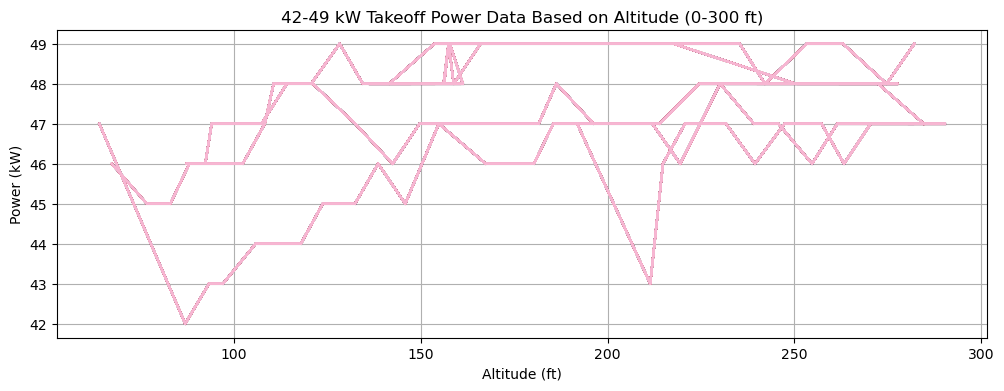

CPU times: total: 1.2 s
Wall time: 4.47 s


In [93]:
%%time
cell_diff = 20
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(derated):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_derated * 100)}%]", end='', flush = True)
    if df_derated["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_derated["alt"][i].diff(periods=cell_diff)
        time_diff = df_derated["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_derated["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        
        prev_speed = -1
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
                 
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_derated["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_derated["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_derated["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                # Extract the relevant slice
                pwr_slice = df_derated["kw"][i][start_idx:end_idx]

                # Find the indices where the value is between 50 and 60
                in_range_idx = pwr_slice[(pwr_slice >= 42) & (pwr_slice <= 49)].index

                # Update end_idx if values between 50 and 60 are found
                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]  # Include the last index in the range
                
                # Update start_idx to the first value in the range 50 to 60
                    # if df_derated["kw"][i][start_idx] < 50 or df_derated["kw"][i][start_idx] > 60:
                    while start_idx < end_idx and (df_derated["kw"][i][start_idx] < 42 or df_derated["kw"][i][start_idx] > 49):
                        start_idx += 1

                    # Ensure start_idx is less than end_idx
                    if start_idx < end_idx:
                            
                        
                        # Apply the filtering with the new start_idx and end_idx
                        filtered_pwr = df_derated["kw"][i][start_idx:end_idx]
                        filtered_alt = df_derated["alt"][i][start_idx:end_idx]
                        
                        
                        
                        # THIS IS THE ONLY WORKING FILTER: Further filter the slice to ensure only values between 50 and 60
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 42) & (filtered_pwr <= 49)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]
                        

                        plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_derated))
                        
                     
                    
                        
                        
                        filtered_roll = df_derated["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna = True)  
                        
                        if abs(mean_roll) < 5:
                            filtered_speed = df_derated["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True)*1.688

                            
                            if mean_speed != prev_speed:
                      
                               
                                
                                filtered_time = df_derated["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                                
                                filtered_pitch = df_derated["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna = True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                                    print('nana')
                                else:
                                    if diff_alt != 0:
                                        
                                        diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                        
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time/diff_alt2*300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)
                                                
                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    
                                                    energy_list.append(mean_energy)
                                                    
                                                    # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                                    
                                                    prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('42-49 kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/derated/csv-26313-6349 [33%]

Processing file data/waterloo/flight/derated/csv-26330-6353 [100%]
Average Power: 50.912 kW
Average Time per 300 ft: 14.902 s
Average Speed: 121.731 ft/s
Average Pitch: 9.741°
Average Energy: 0.21 kWh
Plotting...


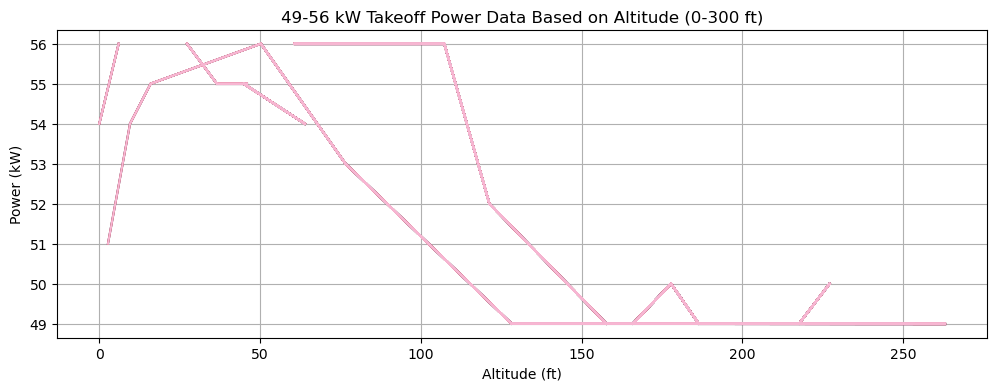

CPU times: total: 1.12 s
Wall time: 1.97 s


In [96]:
%%time
cell_diff = 20
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(derated):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_derated * 100)}%]", end='', flush = True)
    if df_derated["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_derated["alt"][i].diff(periods=cell_diff)
        time_diff = df_derated["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_derated["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        
        prev_speed = -1
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
                 
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_derated["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_derated["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_derated["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                # Extract the relevant slice
                pwr_slice = df_derated["kw"][i][start_idx:end_idx]

                # Find the indices where the value is between 50 and 60
                in_range_idx = pwr_slice[(pwr_slice >= 49) & (pwr_slice <= 56)].index

                # Update end_idx if values between 50 and 60 are found
                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]  # Include the last index in the range
                
                # Update start_idx to the first value in the range 50 to 60
                    # if df_derated["kw"][i][start_idx] < 50 or df_derated["kw"][i][start_idx] > 60:
                    while start_idx < end_idx and (df_derated["kw"][i][start_idx] < 49 or df_derated["kw"][i][start_idx] > 56):
                        start_idx += 1

                    # Ensure start_idx is less than end_idx
                    if start_idx < end_idx:
                            
                        
                        # Apply the filtering with the new start_idx and end_idx
                        filtered_pwr = df_derated["kw"][i][start_idx:end_idx]
                        filtered_alt = df_derated["alt"][i][start_idx:end_idx]
                        
                        
                        
                        # THIS IS THE ONLY WORKING FILTER: Further filter the slice to ensure only values between 50 and 60
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 49) & (filtered_pwr <= 56)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]
                        

                        plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_derated))
                        
                     
                    
                        
                        
                        filtered_roll = df_derated["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna = True)  
                        
                        if abs(mean_roll) < 5:
                            filtered_speed = df_derated["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True)*1.688

                            
                            if mean_speed != prev_speed:
                      
                               
                                
                                filtered_time = df_derated["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                                
                                filtered_pitch = df_derated["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna = True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                
                                if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                                    print('nana')
                                else:
                                    if diff_alt != 0:
                                        
                                        diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                        
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time/diff_alt2*300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)
                                                
                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    
                                                    energy_list.append(mean_energy)
                                                    
                                                    # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                                    
                                                    prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('49-56 kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/derated/csv-26313-6349 [33%]

Processing file data/waterloo/flight/derated/csv-26330-6353 [100%]
Average Power: 57.278 kW
Average Time per 300 ft: 13.093 s
Average Speed: 109.026 ft/s
Average Pitch: 12.181°
Average Energy: 0.208 kWh
Plotting...


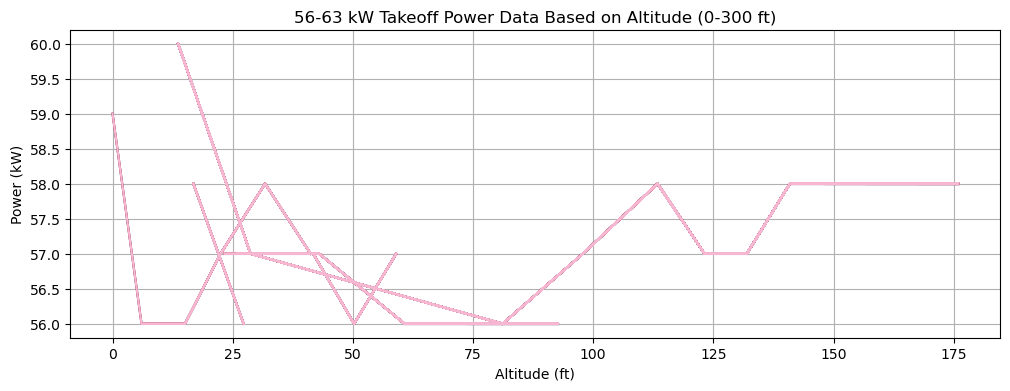

CPU times: total: 594 ms
Wall time: 1.68 s


In [97]:
%%time
cell_diff = 20
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(derated):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_derated * 100)}%]", end='', flush = True)
    if df_derated["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_derated["alt"][i].diff(periods=cell_diff)
        time_diff = df_derated["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_derated["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        
        prev_speed = -1
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
                 
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_derated["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_derated["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_derated["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
            
                # Extract the relevant slice
                pwr_slice = df_derated["kw"][i][start_idx:end_idx]

                # Find the indices where the value is between 50 and 60
                in_range_idx = pwr_slice[(pwr_slice >= 56) & (pwr_slice <= 63)].index

                # Update end_idx if values between 50 and 60 are found
                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]  # Include the last index in the range
                
                # Update start_idx to the first value in the range 50 to 60
                    # if df_derated["kw"][i][start_idx] < 50 or df_derated["kw"][i][start_idx] > 60:
                    while start_idx < end_idx and (df_derated["kw"][i][start_idx] < 56 or df_derated["kw"][i][start_idx] > 63):
                        start_idx += 1

                    # Ensure start_idx is less than end_idx
                    if start_idx < end_idx:
                            
                        
                        # Apply the filtering with the new start_idx and end_idx
                        filtered_pwr = df_derated["kw"][i][start_idx:end_idx]
                        filtered_alt = df_derated["alt"][i][start_idx:end_idx]
                        
                        
                        
                        # THIS IS THE ONLY WORKING FILTER: Further filter the slice to ensure only values between 50 and 60
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 56) & (filtered_pwr <= 63)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]
                        

                        plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_derated))
      
                        filtered_roll = df_derated["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna = True)  
                        
                        if abs(mean_roll) < 5:
                            filtered_speed = df_derated["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True)*1.688

                            
                            if mean_speed != prev_speed:
                      
                                filtered_time = df_derated["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                                
                                filtered_pitch = df_derated["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna = True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                
                                if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                                    print('nana')
                                else:
                                    if diff_alt != 0:
                                        
                                        diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                        
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time/diff_alt2*300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)
                                                
                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    
                                                    energy_list.append(mean_energy)
                                                    
                                                    # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                                    
                                                    prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('56-63 kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



Processing file data/waterloo/flight/derated/csv-26313-6349 [33%]

Processing file data/waterloo/flight/derated/csv-26330-6353 [100%]
Average Power: 67.011 kW
Average Time per 300 ft: 20.205 s
Average Speed: 100.044 ft/s
Average Pitch: 9.244°
Average Energy: 0.267 kWh
Plotting...


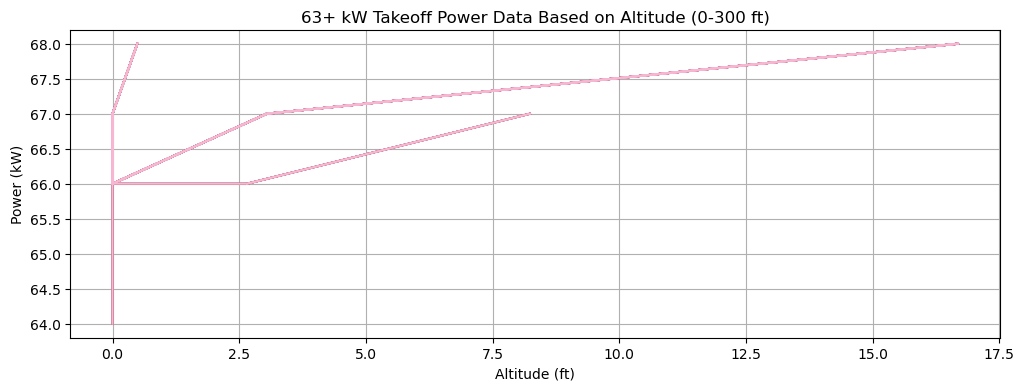

CPU times: total: 734 ms
Wall time: 1.93 s


In [98]:
%%time
cell_diff = 20
colormap = plt.colormaps['tab20']
plt.figure(figsize=(12, 4))

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
speed_list = []
pitch_list = []

for i, subfolder in enumerate(derated):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_derated * 100)}%]", end='', flush = True)
    if df_derated["alt"][i].max() < 1300:
        # Calculates the slope of cells 20 cells away from each other
        alt_diff = df_derated["alt"][i].diff(periods=cell_diff)
        time_diff = df_derated["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_derated["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff 
        # Find the indices where slope is over 450
        high_slope_indices = slope[slope > 400].index
    
        if not high_slope_indices.empty:
            # Plots the data inbtwn data sufficient slope
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_derated["alt"][i]), idx + 1)
                
                while start_idx < end_idx and df_derated["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_derated["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1
                
                if start_idx == end_idx:
                    # No valid altitude values within the range
                    continue
        

                # Extract the relevant slice
                pwr_slice = df_derated["kw"][i][start_idx:end_idx]

                # Find the first index where the value exceeds 60
                exceed_idx = pwr_slice[pwr_slice < 63].index

                # Update end_idx if a value greater than 60 is found
                if not exceed_idx.empty:
                    end_idx = exceed_idx[0]

                # Update start_idx if the initial value exceeds 60
                if df_derated["kw"][i][start_idx] < 63:
                    start_idx += 1
                    while start_idx < end_idx and df_derated["kw"][i][start_idx] > 63:
                        start_idx += 1

                # Apply the filtering with the new start_idx and end_idx
                filtered_pwr = df_derated["kw"][i][start_idx:end_idx]
                filtered_alt = df_derated["alt"][i][start_idx:end_idx]
                diff_time = df_derated["time"][i][end_idx]-df_derated["time"][i][start_idx]
                diff_alt = df_derated["alt"][i][end_idx]-df_derated["alt"][i][start_idx]
                
                
                plt.plot(filtered_alt, filtered_pwr, color=colormap(i / total_derated))
      
                filtered_roll = df_derated["roll"][i][filtered_pwr.index]
                filtered_roll = filtered_roll.loc[filtered_pwr.index]
                mean_roll = filtered_roll.mean(skipna = True)  
                
                if abs(mean_roll) < 5:
                    filtered_speed = df_derated["speed"][i][start_idx:end_idx]
                    filtered_speed = filtered_speed.loc[filtered_pwr.index]
                    mean_speed = filtered_speed.mean(skipna=True)*1.688

                    
                    if mean_speed != prev_speed:
                
                        filtered_time = df_derated["time"][i][start_idx:end_idx]
                        filtered_time = filtered_time.loc[filtered_pwr.index]
                        diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                        diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]
                        
                        filtered_pitch = df_derated["pitch"][i][start_idx:end_idx]
                        filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                        mean_pitch = filtered_pitch.mean(skipna = True)
                        mean_pwr = filtered_pwr.mean(skipna=True)
                        
                
                        if np.isnan(diff_alt) or np.isnan(diff_time) or np.isnan(mean_speed) or np.isnan(mean_pitch) or np.isnan(mean_pwr):
                            print('nana')
                        else:
                            if diff_alt != 0:
                                
                                diff_alt2 = mean_speed*math.sin(math.radians(mean_pitch))*diff_time
                                
                                if not np.isnan(diff_alt2):
                                    if abs(diff_alt2) != 0:
                                        time_per_alt = diff_time/diff_alt2*300
                                        if not np.isnan(time_per_alt):
                                            time_per_alt_list.append(time_per_alt)
                                            speed_list.append(mean_speed)
                                            pitch_list.append(mean_pitch)
                                            power_list.append(mean_pwr)
                                        
                                            mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                            
                                            energy_list.append(mean_energy)
                                            
                                            # print(f'PWR:{mean_pwr:.4g}-TME:{diff_time*60:.4g}-ALT:{diff_alt:.4g}-SLP:{time_per_alt}-PTH:{mean_pitch:.4g}-ROL:{mean_roll:.4g}--SPD:{mean_speed:.4g}-NRG:{mean_energy:.4g}')
                                            
                                            prev_speed = mean_speed
                                
print('')
average_power = round((abs(np.mean(power_list))),3)
average_slope = round((abs(np.mean(time_per_alt_list))),3)
average_speed = round((abs(np.mean(speed_list))),3)
average_pitch = round((abs(np.mean(pitch_list))),3)
average_energy = round((abs(np.mean(energy_list))),3)
print(f"Average Power: {average_power} kW")
print(f"Average Time per 300 ft: {average_slope} s")
print(f"Average Speed: {average_speed} ft/s")
print(f"Average Pitch: {average_pitch}°")
print(f"Average Energy: {average_energy} kWh")
print("Plotting...")
plt.xlabel('Altitude (ft)')
plt.ylabel('Power (kW)')
plt.title('63+ kW Takeoff Power Data Based on Altitude (0-300 ft)')
plt.grid(True)
plt.show()



### Optimization Model

#### 0-300 ft

In [113]:
energy_per_power = {kw: [] for kw in range(42, 71)}

cell_diff = 20

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush=True)
    if df_power["alt"][i].max() < 1300:
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff
        high_slope_indices = slope[slope > 400].index

        prev_speed = -1
        if not high_slope_indices.empty:
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)

                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1

                if start_idx == end_idx:
                    continue

                pwr_slice = df_power["kw"][i][start_idx:end_idx]
                in_range_idx = pwr_slice[(pwr_slice >= 42) & (pwr_slice <= 70)].index

                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]

                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 42 or df_power["kw"][i][start_idx] > 70):
                        start_idx += 1

                    if start_idx < end_idx:
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 42) & (filtered_pwr <= 70)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]

                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna=True)

                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True) * 1.688

                            if mean_speed != prev_speed:
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]

                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna=True)
                                mean_pwr = filtered_pwr.mean(skipna=True)

                                if not np.isnan(diff_alt) and not np.isnan(diff_time) and not np.isnan(mean_speed) and not np.isnan(mean_pitch) and not np.isnan(mean_pwr):
                                    if diff_alt != 0:
                                        diff_alt2 = mean_speed * math.sin(math.radians(mean_pitch)) * diff_time
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time / diff_alt2 * 300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)

                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    energy_list.append(mean_energy)
                                                    energy_per_power[round(mean_pwr)].append(mean_energy)

                                                    prev_speed = mean_speed

print('')
average_energy_per_power = {kw: np.mean(energies) for kw, energies in energy_per_power.items() if energies}
best_power = min(average_energy_per_power, key=average_energy_per_power.get)
best_average_energy = average_energy_per_power[best_power]

print(f"Best Power: {best_power} kW with Average Energy: {round(best_average_energy,3)} kWh")
print("Plotting...")


Processing file data/waterloo/flight/csv-24758-5821 [1%]

Processing file data/waterloo/flight/Derated [100%] [99%]
Best Power: 45 kW with Average Energy: 0.259 kWh
Plotting...


#### 0-175 ft

In [114]:
energy_per_power = {kw: [] for kw in range(42, 71)}

cell_diff = 20

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush=True)
    if df_power["alt"][i].max() < 1300:
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff
        high_slope_indices = slope[slope > 400].index

        prev_speed = -1
        if not high_slope_indices.empty:
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)

                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 175:
                    end_idx -= 1

                if start_idx == end_idx:
                    continue

                pwr_slice = df_power["kw"][i][start_idx:end_idx]
                in_range_idx = pwr_slice[(pwr_slice >= 42) & (pwr_slice <= 70)].index

                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]

                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 42 or df_power["kw"][i][start_idx] > 70):
                        start_idx += 1

                    if start_idx < end_idx:
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 42) & (filtered_pwr <= 70)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]

                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna=True)

                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True) * 1.688

                            if mean_speed != prev_speed:
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]

                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna=True)
                                mean_pwr = filtered_pwr.mean(skipna=True)

                                if not np.isnan(diff_alt) and not np.isnan(diff_time) and not np.isnan(mean_speed) and not np.isnan(mean_pitch) and not np.isnan(mean_pwr):
                                    if diff_alt != 0:
                                        diff_alt2 = mean_speed * math.sin(math.radians(mean_pitch)) * diff_time
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time / diff_alt2 * 300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)

                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    energy_list.append(mean_energy)
                                                    energy_per_power[round(mean_pwr)].append(mean_energy)

                                                    prev_speed = mean_speed

print('')
average_energy_per_power = {kw: np.mean(energies) for kw, energies in energy_per_power.items() if energies}
best_power = min(average_energy_per_power, key=average_energy_per_power.get)
best_average_energy = average_energy_per_power[best_power]

print(f"Best Power: {best_power} kW with Average Energy: {round(best_average_energy,3)} kWh")
print("Plotting...")


Processing file data/waterloo/flight/Derated [100%] [99%]
Best Power: 43 kW with Average Energy: 0.209 kWh
Plotting...


#### 175-300 ft

In [115]:
energy_per_power = {kw: [] for kw in range(42, 71)}

cell_diff = 20

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush=True)
    if df_power["alt"][i].max() < 1300:
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff
        high_slope_indices = slope[slope > 400].index

        prev_speed = -1
        if not high_slope_indices.empty:
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)

                while start_idx < end_idx and df_power["alt"][i][start_idx] < 175:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1

                if start_idx == end_idx:
                    continue

                pwr_slice = df_power["kw"][i][start_idx:end_idx]
                in_range_idx = pwr_slice[(pwr_slice >= 42) & (pwr_slice <= 70)].index

                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]

                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 42 or df_power["kw"][i][start_idx] > 70):
                        start_idx += 1

                    if start_idx < end_idx:
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 42) & (filtered_pwr <= 70)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]

                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna=True)

                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True) * 1.688

                            if mean_speed != prev_speed:
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]

                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna=True)
                                mean_pwr = filtered_pwr.mean(skipna=True)

                                if not np.isnan(diff_alt) and not np.isnan(diff_time) and not np.isnan(mean_speed) and not np.isnan(mean_pitch) and not np.isnan(mean_pwr):
                                    if diff_alt != 0:
                                        diff_alt2 = mean_speed * math.sin(math.radians(mean_pitch)) * diff_time
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time / diff_alt2 * 300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)

                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    energy_list.append(mean_energy)
                                                    energy_per_power[round(mean_pwr)].append(mean_energy)

                                                    prev_speed = mean_speed

print('')
average_energy_per_power = {kw: np.mean(energies) for kw, energies in energy_per_power.items() if energies}
best_power = min(average_energy_per_power, key=average_energy_per_power.get)
best_average_energy = average_energy_per_power[best_power]

print(f"Best Power: {best_power} kW with Average Energy: {round(best_average_energy,3)} kWh")
print("Plotting...")


Processing file data/waterloo/flight/Derated [100%] [99%]
Best Power: 68 kW with Average Energy: 0.261 kWh
Plotting...


#### OAT

In [120]:

energy_per_temp = {}

cell_diff = 20

slopes_soc_per_ft = []
power_list = []
time_per_alt_list = []
roll_list = []
speed_list = []
pitch_list = []
energy_list = []

for i, subfolder in enumerate(subfolders):
    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush=True)
    if df_power["alt"][i].max() < 1300:
        alt_diff = df_power["alt"][i].diff(periods=cell_diff)
        time_diff = df_power["time"][i].diff(periods=cell_diff)
        temp_alt_diff = df_power["alt"][i].diff(periods=10)
        alt_diff[temp_alt_diff < 0] = 0
        slope = alt_diff / time_diff
        high_slope_indices = slope[slope > 400].index

        prev_speed = -1
        if not high_slope_indices.empty:
            for idx in high_slope_indices:
                start_idx = max(0, idx - cell_diff + 1)
                end_idx = min(len(df_power["alt"][i]), idx + 1)

                while start_idx < end_idx and df_power["alt"][i][start_idx] < 0:
                    start_idx += 1
                while end_idx > start_idx and df_power["alt"][i][end_idx - 1] > 300:
                    end_idx -= 1

                if start_idx == end_idx:
                    continue

                pwr_slice = df_power["kw"][i][start_idx:end_idx]
                in_range_idx = pwr_slice[(pwr_slice >= 42) & (pwr_slice <= 70)].index

                if not in_range_idx.empty:
                    end_idx = in_range_idx[-1]

                    while start_idx < end_idx and (df_power["kw"][i][start_idx] < 42 or df_power["kw"][i][start_idx] > 70):
                        start_idx += 1

                    if start_idx < end_idx:
                        filtered_pwr = df_power["kw"][i][start_idx:end_idx]
                        filtered_alt = df_power["alt"][i][start_idx:end_idx]
                        filtered_pwr = filtered_pwr[(filtered_pwr >= 42) & (filtered_pwr <= 70)]
                        filtered_alt = filtered_alt.loc[filtered_pwr.index]

                        filtered_roll = df_power["roll"][i][filtered_pwr.index]
                        filtered_roll = filtered_roll.loc[filtered_pwr.index]
                        mean_roll = filtered_roll.mean(skipna=True)

                        if abs(mean_roll) < 5:
                            filtered_speed = df_power["speed"][i][start_idx:end_idx]
                            filtered_speed = filtered_speed.loc[filtered_pwr.index]
                            mean_speed = filtered_speed.mean(skipna=True) * 1.688

                            if mean_speed != prev_speed:
                                filtered_time = df_power["time"][i][start_idx:end_idx]
                                filtered_time = filtered_time.loc[filtered_pwr.index]
                                diff_time = filtered_time.iloc[-1] - filtered_time.iloc[0]
                                diff_alt = filtered_alt.iloc[-1] - filtered_alt.iloc[0]

                                filtered_pitch = df_power["pitch"][i][start_idx:end_idx]
                                filtered_pitch = filtered_pitch.loc[filtered_pwr.index]
                                mean_pitch = filtered_pitch.mean(skipna=True)
                                mean_pwr = filtered_pwr.mean(skipna=True)
                                
                                filtered_temp = df_power["oat"][i][start_idx:end_idx]
                                mean_temp = filtered_temp.mean(skipna=True)

                                if not np.isnan(diff_alt) and not np.isnan(diff_time) and not np.isnan(mean_speed) and not np.isnan(mean_pitch) and not np.isnan(mean_pwr) and not np.isnan(mean_temp):
                                    if diff_alt != 0:
                                        diff_alt2 = mean_speed * math.sin(math.radians(mean_pitch)) * diff_time
                                        if not np.isnan(diff_alt2):
                                            if abs(diff_alt2) != 0:
                                                time_per_alt = diff_time / diff_alt2 * 300
                                                if not np.isnan(time_per_alt):
                                                    time_per_alt_list.append(time_per_alt)
                                                    speed_list.append(mean_speed)
                                                    pitch_list.append(mean_pitch)
                                                    power_list.append(mean_pwr)

                                                    mean_energy = ((mean_pwr * diff_time) / 3600) * (300 / diff_alt2)
                                                    energy_list.append(mean_energy)

                                                    if mean_temp not in energy_per_temp:
                                                        energy_per_temp[mean_temp] = []
                                                    energy_per_temp[mean_temp].append(mean_energy)

                                                    prev_speed = mean_speed

print('')


average_energy_per_temp = {temp: np.mean(energies) for temp, energies in energy_per_temp.items() if energies}


best_temp = min(average_energy_per_temp, key=average_energy_per_temp.get)
best_average_energy = average_energy_per_temp[best_temp]

def calculate_energy_deviation(temperature, offset):
    target_temp = temperature + offset
    target_energies = [energy for temp, energies in energy_per_temp.items() for energy in energies if abs(temp - target_temp) < 0.25]
    if target_energies:
        return np.mean(target_energies)
    return None

avg_energy_1_deg_higher = calculate_energy_deviation(best_temp, 1)
avg_energy_1_deg_lower = calculate_energy_deviation(best_temp, -1)
avg_energy_5_deg_higher = calculate_energy_deviation(best_temp, 5)
avg_energy_5_deg_lower = calculate_energy_deviation(best_temp, -5)

print(f"Best Temperature: {best_temp} °C with Average Energy: {best_average_energy} kWh")
print(f"Average Energy 1°C Higher: {avg_energy_1_deg_higher} kWh")
print(f"Average Energy 1°C Lower: {avg_energy_1_deg_lower} kWh")
print(f"Average Energy 5°C Higher: {avg_energy_5_deg_higher} kWh")
print(f"Average Energy 5°C Lower: {avg_energy_5_deg_lower} kWh")



Processing file data/waterloo/flight/Derated [100%] [99%]
Best Temperature: 19.625 °C with Average Energy: 0.18498399290963344 kWh
Average Energy 1°C Higher: 0.2845064500199627 kWh
Average Energy 1°C Lower: 0.2730596513507853 kWh
Average Energy 5°C Higher: 0.2495735039392559 kWh
Average Energy 5°C Lower: 0.2932656653363918 kWh


: 

### Filtering Out Standing and Rolling Takeoffs

#### Slope and Correlation Method

In [5]:
def calculate_slope_and_correlation(group, nrg = True):
    if len(group) < 2:
        return pd.Series({'Slope Linear': np.nan, 'R Linear': np.nan, 
                          'Slope Exponential': np.nan, 'R Exponential': np.nan})
    
    if nrg:
        x = group['Avg Power']
        y = group['Time']*group['Avg Power']/60
    else:
        x = group['Avg Power']
        y = group['Time']
    
    # Linear fit
    slope_linear = np.polyfit(x, y, 1)[0]
    correlation_matrix_linear = np.corrcoef(x, y)
    correlation_coefficient_linear = correlation_matrix_linear[0, 1]
    
    # Exponential fit (using logarithm of y)
    y_log = np.log(y)
    slope_exp = np.polyfit(x, y_log, 1)[0]
    correlation_matrix_exp = np.corrcoef(x, y_log)
    correlation_coefficient_exp = correlation_matrix_exp[0, 1]
    
    return pd.Series({'Slope Linear': slope_linear, 'R Linear': correlation_coefficient_linear,
                      'Slope Exponential': slope_exp, 'R Exponential': correlation_coefficient_exp})

#### Standing Takeoff

##### Altitude

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


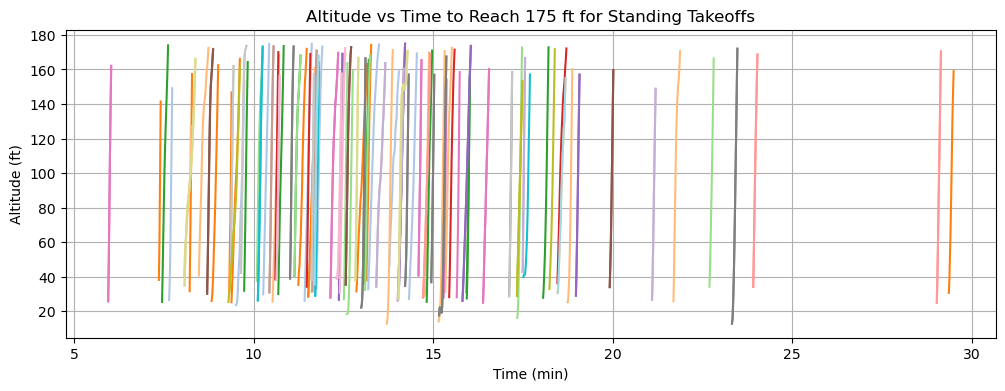

CPU times: total: 5.14 s
Wall time: 12.8 s


In [277]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True
                                
print('')
print("Plotting...")
plt.xlabel('Time (min)')
plt.ylabel('Altitude (ft)')
plt.title('Altitude vs Time to Reach 175 ft for Standing Takeoffs')
plt.grid(True)
plt.show()


##### Average Time

Processing file data/waterloo/flight/csv-20794-4615_may31_0210pm_dc [0%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


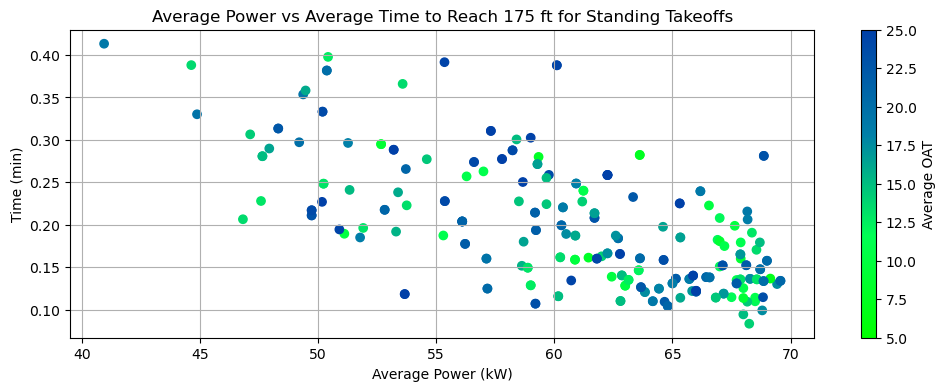

  OAT Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0    5-10     -0.008753 -0.681354          -0.042606      -0.677562
1   10-15     -0.007070 -0.707369          -0.034903      -0.705166
2   15-20     -0.008187 -0.754837          -0.038436      -0.705557
3   20-25     -0.007195 -0.595755          -0.035300      -0.620713
CPU times: total: 5.45 s
Wall time: 12.5 s


<timed exec>:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:155: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [341]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        initial_range = True
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
            
print('')
print("Plotting...")

plt.scatter(df_slope["Avg Power"], df_slope["Time"], marker='o', c=df_slope["Average OAT"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='Average OAT', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Time (min)')
plt.title('Average Power vs Average Time to Reach 175 ft for Standing Takeoffs')
plt.grid(True)
plt.show()


bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

# Cut the data into bins based on 'Average OAT'
df_slope['OAT Bin'] = pd.cut(df_slope['Average OAT'], bins=bins, labels=labels, right=False)


# Group by 'OAT Bin' and apply the function to calculate slope and correlation
slopes_and_corr = df_slope.groupby('OAT Bin').apply(calculate_slope_and_correlation, False).reset_index()

print(slopes_and_corr)

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


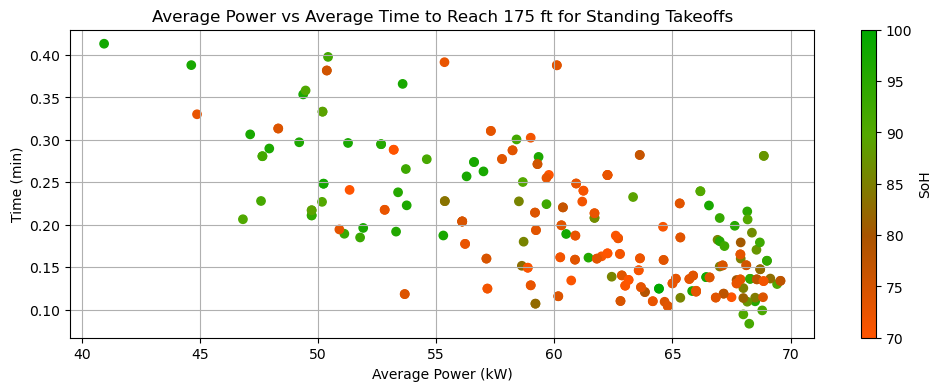

  SoH Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0   70-80     -0.008381 -0.577545          -0.040597      -0.569728
1   80-90     -0.004913 -0.511825          -0.024495      -0.485803
2  90-100     -0.006610 -0.723060          -0.031168      -0.723756
CPU times: total: 4.08 s
Wall time: 13.2 s


<timed exec>:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:151: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [342]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(1, 0.33, 0), (0.66, 0.33, 0), (0.33, 0.66, 0), (0, 0.66, 0)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=70, vmax=100)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    continue
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
  
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"], marker='o', c=df_slope["SoH"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='SoH', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Time (min)')
plt.title('Average Power vs Average Time to Reach 175 ft for Standing Takeoffs')
plt.grid(True)
plt.show()

bins = [70, 80, 90, 100]
labels = ['70-80', '80-90', '90-100']

df_slope['SoH Bin'] = pd.cut(df_slope['SoH'], bins=bins, labels=labels, right=False)


slopes_and_corr = df_slope.groupby('SoH Bin').apply(calculate_slope_and_correlation, False).reset_index()

print(slopes_and_corr)

In [358]:
slopes_and_corrs = calculate_slope_and_correlation(df_slope, False)
print("General Slopes and Correlations:")
print(slopes_and_corrs)
print('')

General Slopes and Correlations:
Slope Linear        -0.007389
R Linear            -0.650544
Slope Exponential   -0.035668
R Exponential       -0.641037
dtype: float64



##### Average Energy

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


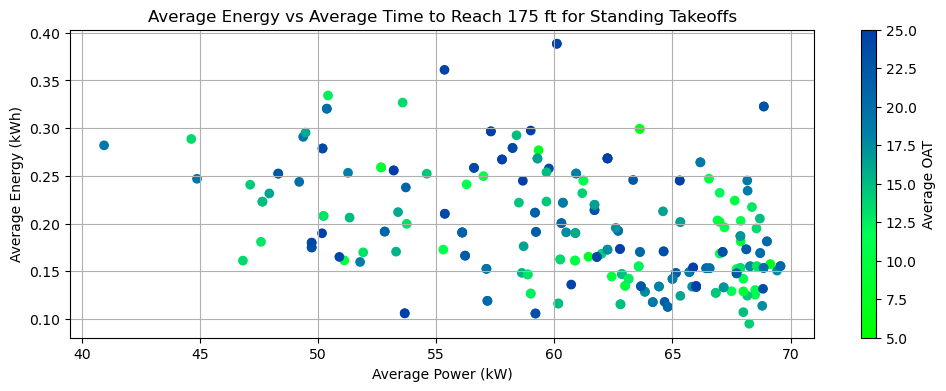

  OAT Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0    5-10     -0.005215 -0.465362          -0.026065      -0.490332
1   10-15     -0.003425 -0.454303          -0.017685      -0.450199
2   15-20     -0.003960 -0.488985          -0.020798      -0.475051
3   20-25     -0.003655 -0.357397          -0.018404      -0.381791
CPU times: total: 3.86 s
Wall time: 12.8 s


<timed exec>:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:155: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [355]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        initial_range = True
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
            
print('')
print("Plotting...")

plt.scatter(df_slope["Avg Power"], df_slope["Time"]*df_slope["Avg Power"]/60, marker='o', c=df_slope["Average OAT"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='Average OAT', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Average Energy (kWh)')
plt.title('Average Energy vs Average Time to Reach 175 ft for Standing Takeoffs')
plt.grid(True)
plt.show()


bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

# Cut the data into bins based on 'Average OAT'
df_slope['OAT Bin'] = pd.cut(df_slope['Average OAT'], bins=bins, labels=labels, right=False)


# Group by 'OAT Bin' and apply the function to calculate slope and correlation
slopes_and_corr = df_slope.groupby('OAT Bin').apply(calculate_slope_and_correlation).reset_index()

print(slopes_and_corr)

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


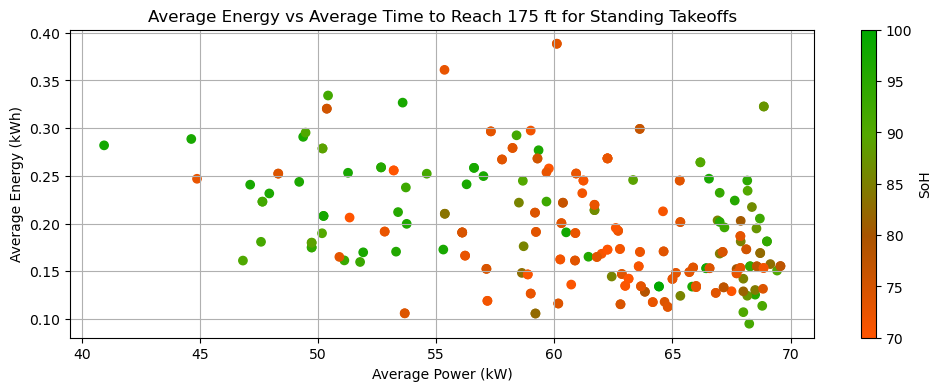

  SoH Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0   70-80     -0.004992 -0.391203          -0.023741      -0.375354
1   80-90     -0.001404 -0.163117          -0.007750      -0.174030
2  90-100     -0.002616 -0.402291          -0.013751      -0.418215
CPU times: total: 4.72 s
Wall time: 12.8 s


<timed exec>:152: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:152: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [357]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(1, 0.33, 0), (0.66, 0.33, 0), (0.33, 0.66, 0), (0, 0.66, 0)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=70, vmax=100)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        initial_range = True
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
            
print('')
print("Plotting...")

plt.scatter(df_slope["Avg Power"], df_slope["Time"]*df_slope["Avg Power"]/60, marker='o', c=df_slope["SoH"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='SoH', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Average Energy (kWh)')
plt.title('Average Energy vs Average Time to Reach 175 ft for Standing Takeoffs')
plt.grid(True)
plt.show()


bins = [70, 80, 90, 100]
labels = ['70-80', '80-90', '90-100']

df_slope['SoH Bin'] = pd.cut(df_slope['SoH'], bins=bins, labels=labels, right=False)

slopes_and_corr = df_slope.groupby('SoH Bin').apply(calculate_slope_and_correlation).reset_index()

print(slopes_and_corr)

In [359]:
slopes_and_corrs = calculate_slope_and_correlation(df_slope)
print("General Slopes and Correlations:")
print(slopes_and_corrs)
print('')

General Slopes and Correlations:
Slope Linear        -0.003630
R Linear            -0.392704
Slope Exponential   -0.018469
R Exponential       -0.396884
dtype: float64



#### Rolling Takeoff

##### Altitude

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


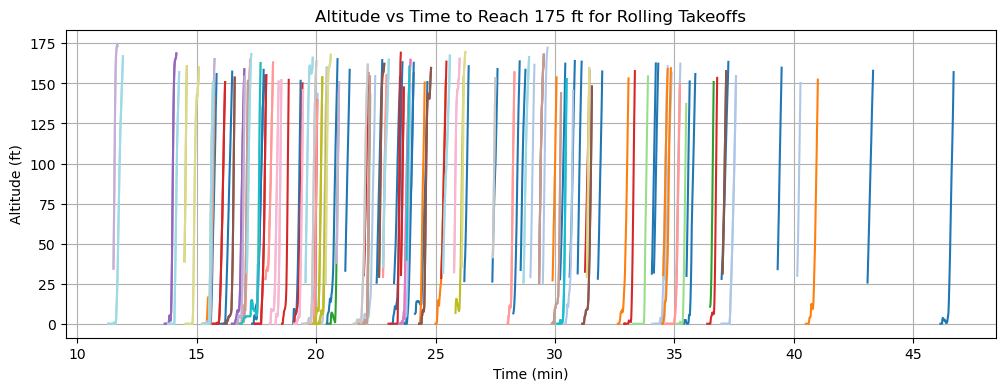

CPU times: total: 6.02 s
Wall time: 13.2 s


In [282]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: 
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True
                                
            
print('')
print("Plotting...")
plt.xlabel('Time (min)')
plt.ylabel('Altitude (ft)')
plt.title('Altitude vs Time to Reach 175 ft for Rolling Takeoffs')
plt.grid(True)
plt.show()

##### Average Time

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


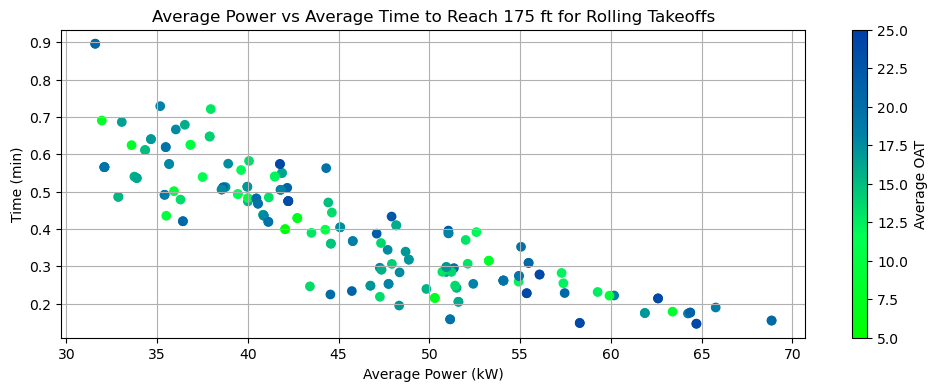

  OAT Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0    5-10     -0.015476 -0.898187          -0.041462      -0.919672
1   10-15     -0.017035 -0.816349          -0.042391      -0.825305
2   15-20     -0.015934 -0.879035          -0.042733      -0.879076
3   20-25     -0.015278 -0.867554          -0.043761      -0.908234
CPU times: total: 5.06 s
Wall time: 13.7 s


<timed exec>:154: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:154: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [14]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        initial_range = True
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
            
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"], marker='o', c=df_slope["Average OAT"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='Average OAT', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Time (min)')
plt.title('Average Power vs Average Time to Reach 175 ft for Rolling Takeoffs')
plt.grid(True)
plt.show()


bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

# Cut the data into bins based on 'Average OAT'
df_slope['OAT Bin'] = pd.cut(df_slope['Average OAT'], bins=bins, labels=labels, right=False)


# Group by 'OAT Bin' and apply the function to calculate slope and correlation
slopes_and_corr = df_slope.groupby('OAT Bin').apply(calculate_slope_and_correlation, False).reset_index()

print(slopes_and_corr)

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


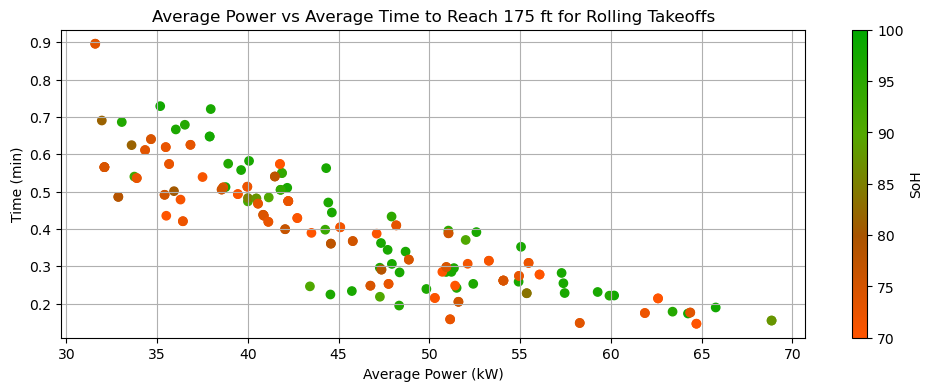

  SoH Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0   70-80     -0.016214 -0.875706          -0.043741      -0.889651
1   80-90     -0.013513 -0.964767          -0.040538      -0.992152
2  90-100     -0.016969 -0.839226          -0.043930      -0.845315
CPU times: total: 4.83 s
Wall time: 13.7 s


<timed exec>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:150: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [13]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(1, 0.33, 0), (0.66, 0.33, 0), (0.33, 0.66, 0), (0, 0.66, 0)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=70, vmax=100)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                        
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    continue
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True        
  
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"], marker='o', c=df_slope["SoH"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='SoH', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Time (min)')
plt.title('Average Power vs Average Time to Reach 175 ft for Rolling Takeoffs')
plt.grid(True)
plt.show()

bins = [70, 80, 90, 100]
labels = ['70-80', '80-90', '90-100']

df_slope['SoH Bin'] = pd.cut(df_slope['SoH'], bins=bins, labels=labels, right=False)


slopes_and_corr = df_slope.groupby('SoH Bin').apply(calculate_slope_and_correlation, False).reset_index()

print(slopes_and_corr)

In [19]:
slopes_and_corrs = calculate_slope_and_correlation(df_slope, False)
print("General Slopes and Correlations:")
print(slopes_and_corrs)
print('')

General Slopes and Correlations:
Slope Linear        -0.015320
R Linear            -0.865176
Slope Exponential   -0.042202
R Exponential       -0.887132
dtype: float64



##### Average Energy

Processing file data/waterloo/flight/csv-20794-4615_may31_0210pm_dc [0%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


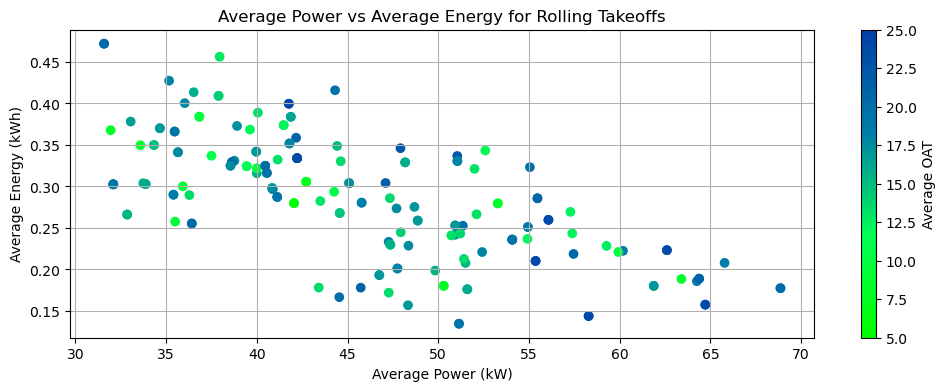

  OAT Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0    5-10     -0.005286 -0.754894          -0.019595      -0.749307
1   10-15     -0.006399 -0.619447          -0.020913      -0.591063
2   15-20     -0.005388 -0.661668          -0.020385      -0.659300
3   20-25     -0.006329 -0.772040          -0.023468      -0.761170
CPU times: total: 4.84 s
Wall time: 13.6 s


<timed exec>:152: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:152: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [18]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True
                                
            
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"]*df_slope["Avg Power"]/60, marker='o', c=df_slope["Average OAT"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='Average OAT', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Average Energy (kWh)')
plt.title('Average Power vs Average Energy for Rolling Takeoffs')
plt.grid(True)
plt.show()

bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

df_slope['OAT Bin'] = pd.cut(df_slope['Average OAT'], bins=bins, labels=labels, right=False)


slopes_and_corr = df_slope.groupby('OAT Bin').apply(calculate_slope_and_correlation).reset_index()

print(slopes_and_corr)

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


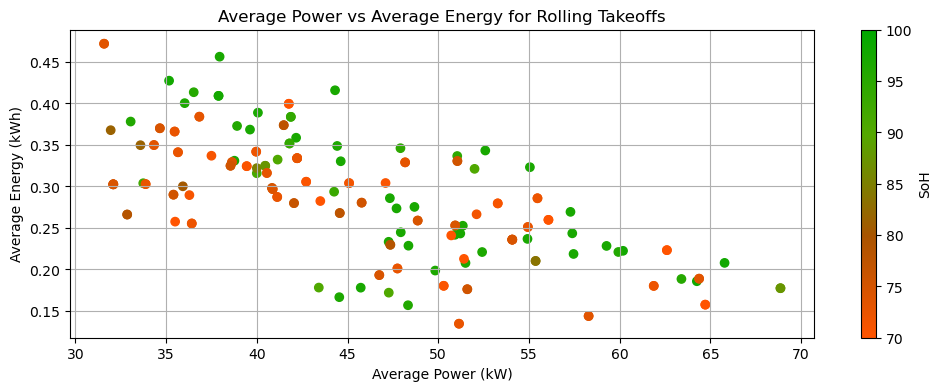

  SoH Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0   70-80     -0.005572 -0.691328          -0.021395      -0.687763
1   80-90     -0.005120 -0.966242          -0.020160      -0.977075
2  90-100     -0.006796 -0.677349          -0.022972      -0.643708
CPU times: total: 5.62 s
Wall time: 13.7 s


<timed exec>:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:151: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [15]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(1, 0.33, 0), (0.66, 0.33, 0), (0.33, 0.66, 0), (0, 0.66, 0)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=70, vmax=100)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 175
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True
                                
  
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"]*df_slope["Avg Power"]/60, marker='o', c=df_slope["SoH"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='SoH', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Average Energy (kWh)')
plt.title('Average Power vs Average Energy for Rolling Takeoffs')
plt.grid(True)
plt.show()

bins = [70, 80, 90, 100]
labels = ['70-80', '80-90', '90-100']

df_slope['SoH Bin'] = pd.cut(df_slope['SoH'], bins=bins, labels=labels, right=False)


slopes_and_corr = df_slope.groupby('SoH Bin').apply(calculate_slope_and_correlation).reset_index()

print(slopes_and_corr)

In [362]:
slopes_and_corrs = calculate_slope_and_correlation(df_slope)
print("General Slopes and Correlations:")
print(slopes_and_corrs)
print('')

General Slopes and Correlations:
Slope Linear        -0.005563
R Linear            -0.688301
Slope Exponential   -0.020764
R Exponential       -0.687857
dtype: float64



### Filtering Out Standing and Rolling Takeoffs (25-300 ft)

#### Standing Takeoff

##### Altitude

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


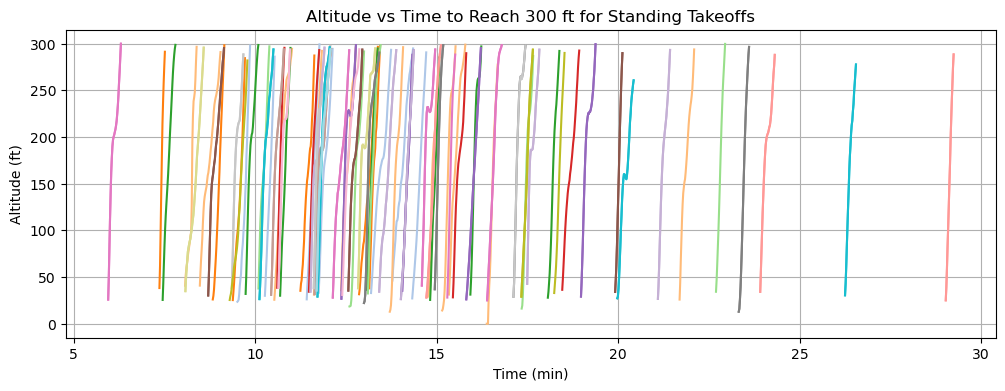

CPU times: total: 7.8 s
Wall time: 13.9 s


In [40]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True
                                
print('')
print("Plotting...")
plt.xlabel('Time (min)')
plt.ylabel('Altitude (ft)')
plt.title('Altitude vs Time to Reach 300 ft for Standing Takeoffs')
plt.grid(True)
plt.show()


##### Average Time

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


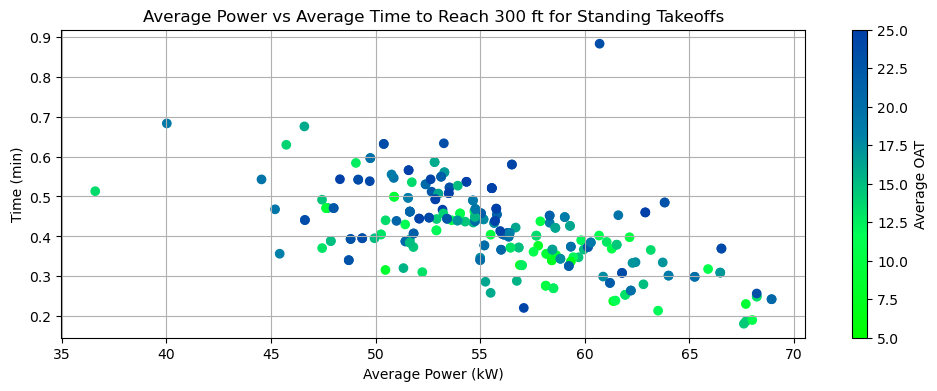

  OAT Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0    5-10     -0.012707 -0.829944          -0.035562      -0.831111
1   10-15     -0.011694 -0.764347          -0.033499      -0.755590
2   15-20     -0.011640 -0.646680          -0.026985      -0.636034
3   20-25     -0.007816 -0.404068          -0.021829      -0.491541
CPU times: total: 9.06 s
Wall time: 14.1 s


<timed exec>:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:155: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [41]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        initial_range = True
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
            
print('')
print("Plotting...")

plt.scatter(df_slope["Avg Power"], df_slope["Time"], marker='o', c=df_slope["Average OAT"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='Average OAT', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Time (min)')
plt.title('Average Power vs Average Time to Reach 300 ft for Standing Takeoffs')
plt.grid(True)
plt.show()


bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

# Cut the data into bins based on 'Average OAT'
df_slope['OAT Bin'] = pd.cut(df_slope['Average OAT'], bins=bins, labels=labels, right=False)


# Group by 'OAT Bin' and apply the function to calculate slope and correlation
slopes_and_corr = df_slope.groupby('OAT Bin').apply(calculate_slope_and_correlation, False).reset_index()

print(slopes_and_corr)

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


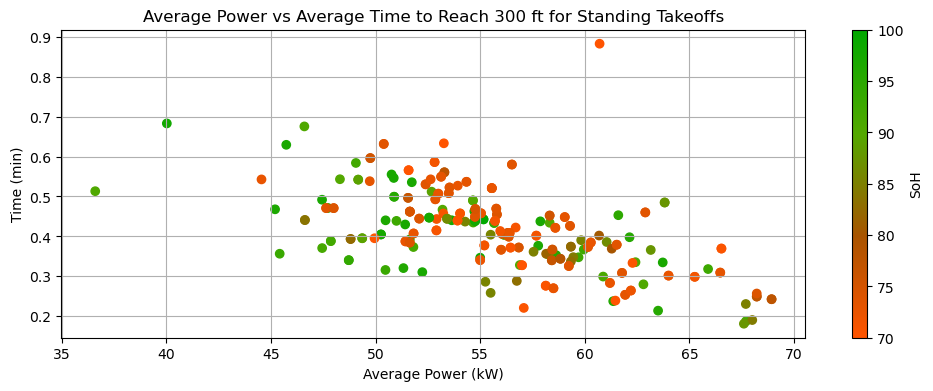

  SoH Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0   70-80     -0.013443 -0.630064          -0.034999      -0.682401
1   80-90     -0.008043 -0.562082          -0.024843      -0.583913
2  90-100     -0.010126 -0.625656          -0.025531      -0.633079
CPU times: total: 9.09 s
Wall time: 13.9 s


<timed exec>:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:151: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [42]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(1, 0.33, 0), (0.66, 0.33, 0), (0.33, 0.66, 0), (0, 0.66, 0)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=70, vmax=100)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    continue
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
  
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"], marker='o', c=df_slope["SoH"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='SoH', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Time (min)')
plt.title('Average Power vs Average Time to Reach 300 ft for Standing Takeoffs')
plt.grid(True)
plt.show()

bins = [70, 80, 90, 100]
labels = ['70-80', '80-90', '90-100']

df_slope['SoH Bin'] = pd.cut(df_slope['SoH'], bins=bins, labels=labels, right=False)


slopes_and_corr = df_slope.groupby('SoH Bin').apply(calculate_slope_and_correlation, False).reset_index()

print(slopes_and_corr)

In [43]:
slopes_and_corrs = calculate_slope_and_correlation(df_slope, False)
print("General Slopes and Correlations:")
print(slopes_and_corrs)
print('')

General Slopes and Correlations:
Slope Linear        -0.010934
R Linear            -0.592846
Slope Exponential   -0.028895
R Exponential       -0.627904
dtype: float64



##### Average Energy

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


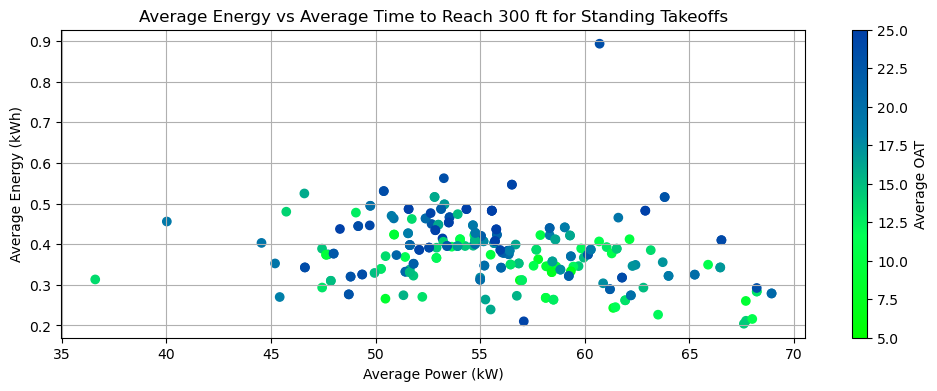

  OAT Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0    5-10     -0.005874 -0.604487          -0.017664      -0.591661
1   10-15     -0.004747 -0.440681          -0.015247      -0.456721
2   15-20     -0.003524 -0.276756          -0.008539      -0.250807
3   20-25     -0.000942 -0.055202          -0.004276      -0.109185
CPU times: total: 8.66 s
Wall time: 14 s


<timed exec>:155: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:155: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [44]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        initial_range = True
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
            
print('')
print("Plotting...")

plt.scatter(df_slope["Avg Power"], df_slope["Time"]*df_slope["Avg Power"]/60, marker='o', c=df_slope["Average OAT"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='Average OAT', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Average Energy (kWh)')
plt.title('Average Energy vs Average Time to Reach 300 ft for Standing Takeoffs')
plt.grid(True)
plt.show()


bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

# Cut the data into bins based on 'Average OAT'
df_slope['OAT Bin'] = pd.cut(df_slope['Average OAT'], bins=bins, labels=labels, right=False)


# Group by 'OAT Bin' and apply the function to calculate slope and correlation
slopes_and_corr = df_slope.groupby('OAT Bin').apply(calculate_slope_and_correlation).reset_index()

print(slopes_and_corr)

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


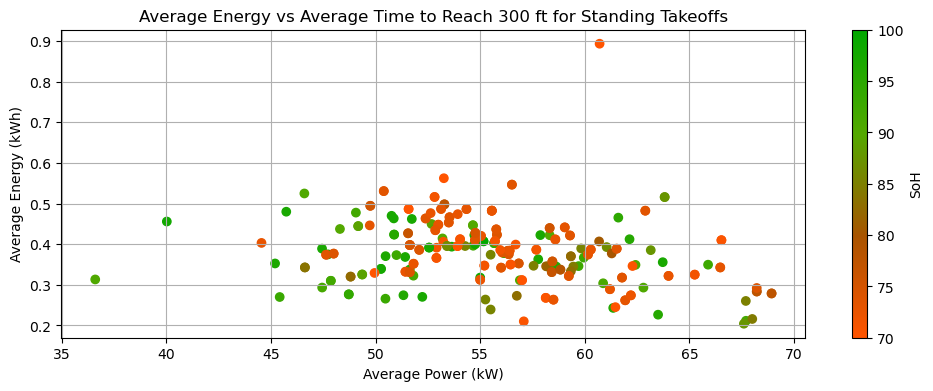

  SoH Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0   70-80     -0.006245 -0.364858          -0.017607      -0.424057
1   80-90     -0.001522 -0.126718          -0.007138      -0.200669
2  90-100     -0.002260 -0.199909          -0.006608      -0.204610
CPU times: total: 9.19 s
Wall time: 14.1 s


<timed exec>:152: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:152: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [45]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(1, 0.33, 0), (0.66, 0.33, 0), (0.33, 0.66, 0), (0, 0.66, 0)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=70, vmax=100)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5 or df_power["time"][i][start_idx] > 30:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count == count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count == count_num:
                    initial_range = True
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        initial_range = True
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
            
print('')
print("Plotting...")

plt.scatter(df_slope["Avg Power"], df_slope["Time"]*df_slope["Avg Power"]/60, marker='o', c=df_slope["SoH"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='SoH', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Average Energy (kWh)')
plt.title('Average Energy vs Average Time to Reach 300 ft for Standing Takeoffs')
plt.grid(True)
plt.show()


bins = [70, 80, 90, 100]
labels = ['70-80', '80-90', '90-100']

df_slope['SoH Bin'] = pd.cut(df_slope['SoH'], bins=bins, labels=labels, right=False)

slopes_and_corr = df_slope.groupby('SoH Bin').apply(calculate_slope_and_correlation).reset_index()

print(slopes_and_corr)

In [46]:
slopes_and_corrs = calculate_slope_and_correlation(df_slope)
print("General Slopes and Correlations:")
print(slopes_and_corrs)
print('')

General Slopes and Correlations:
Slope Linear        -0.003619
R Linear            -0.248921
Slope Exponential   -0.010874
R Exponential       -0.287905
dtype: float64



#### Rolling Takeoff

##### Altitude

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


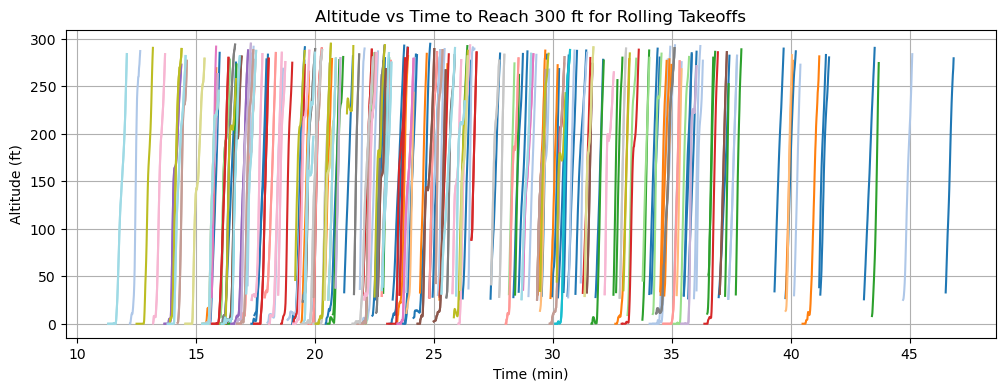

CPU times: total: 10.1 s
Wall time: 15.5 s


In [47]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: 
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True
                                
            
print('')
print("Plotting...")
plt.xlabel('Time (min)')
plt.ylabel('Altitude (ft)')
plt.title('Altitude vs Time to Reach 300 ft for Rolling Takeoffs')
plt.grid(True)
plt.show()

##### Average Time

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


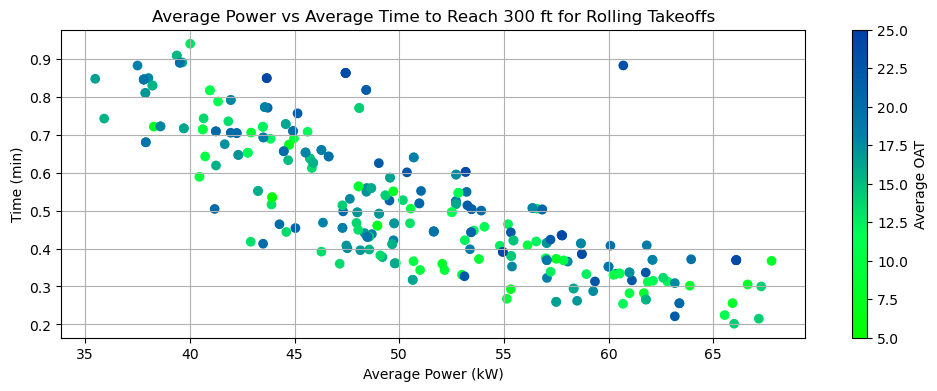

  OAT Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0    5-10     -0.016069 -0.851555          -0.035156      -0.859284
1   10-15     -0.018999 -0.833051          -0.040675      -0.865386
2   15-20     -0.020912 -0.863883          -0.039089      -0.860576
3   20-25     -0.016972 -0.680476          -0.034014      -0.721060
CPU times: total: 10 s
Wall time: 15.4 s


<timed exec>:154: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:154: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [48]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        initial_range = True
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                                
            
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"], marker='o', c=df_slope["Average OAT"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='Average OAT', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Time (min)')
plt.title('Average Power vs Average Time to Reach 300 ft for Rolling Takeoffs')
plt.grid(True)
plt.show()


bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

# Cut the data into bins based on 'Average OAT'
df_slope['OAT Bin'] = pd.cut(df_slope['Average OAT'], bins=bins, labels=labels, right=False)


# Group by 'OAT Bin' and apply the function to calculate slope and correlation
slopes_and_corr = df_slope.groupby('OAT Bin').apply(calculate_slope_and_correlation, False).reset_index()

print(slopes_and_corr)

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


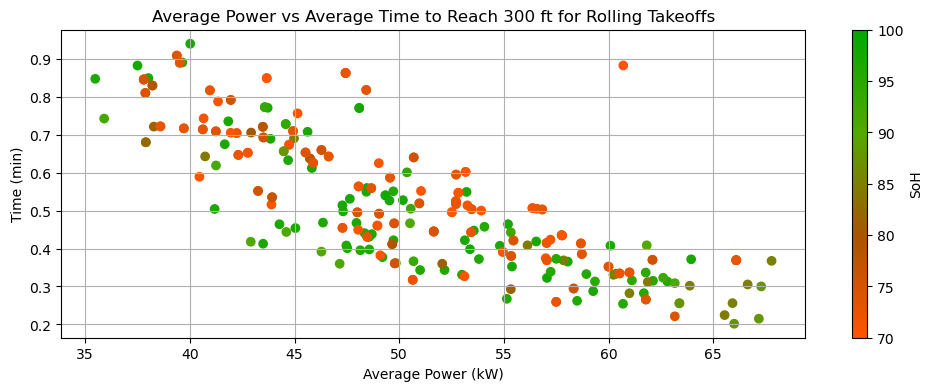

  SoH Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0   70-80     -0.019466 -0.805744          -0.036682      -0.814465
1   80-90     -0.016423 -0.942440          -0.037319      -0.928791
2  90-100     -0.018348 -0.767685          -0.036207      -0.787895
CPU times: total: 10.1 s
Wall time: 15.2 s
Parser   : 156 ms


<timed exec>:150: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:150: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [49]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(1, 0.33, 0), (0.66, 0.33, 0), (0.33, 0.66, 0), (0, 0.66, 0)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=70, vmax=100)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                        
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    continue
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True        
  
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"], marker='o', c=df_slope["SoH"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='SoH', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Time (min)')
plt.title('Average Power vs Average Time to Reach 300 ft for Rolling Takeoffs')
plt.grid(True)
plt.show()

bins = [70, 80, 90, 100]
labels = ['70-80', '80-90', '90-100']

df_slope['SoH Bin'] = pd.cut(df_slope['SoH'], bins=bins, labels=labels, right=False)


slopes_and_corr = df_slope.groupby('SoH Bin').apply(calculate_slope_and_correlation, False).reset_index()

print(slopes_and_corr)

In [50]:
slopes_and_corrs = calculate_slope_and_correlation(df_slope, False)
print("General Slopes and Correlations:")
print(slopes_and_corrs)
print('')

General Slopes and Correlations:
Slope Linear        -0.018781
R Linear            -0.803594
Slope Exponential   -0.037376
R Exponential       -0.821153
dtype: float64



##### Average Energy

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


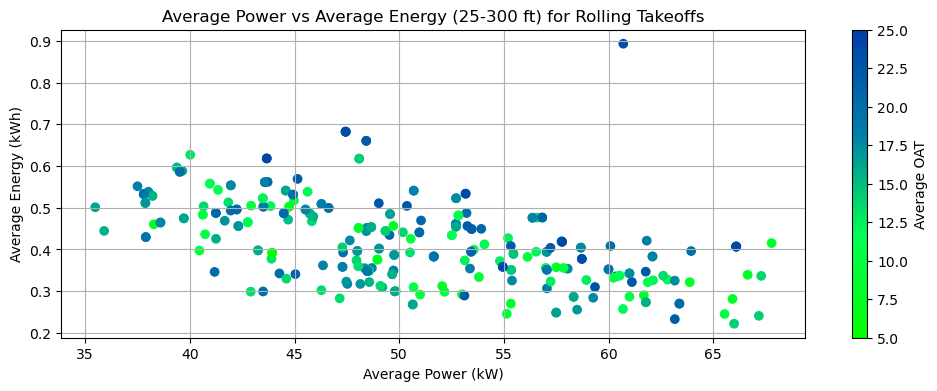

  OAT Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0    5-10     -0.006084 -0.633217          -0.016019      -0.621830
1   10-15     -0.008528 -0.665692          -0.021477      -0.673184
2   15-20     -0.007711 -0.641192          -0.018535      -0.628598
3   20-25     -0.006298 -0.368793          -0.014978      -0.414513
CPU times: total: 9.2 s
Wall time: 15.4 s


<timed exec>:152: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:152: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [51]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(0, 1, 0), (0, 1, 0.33), (0, 0.5, 0.66), (0, 0.25, 0.66)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=5, vmax=25)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 300 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True
                                
            
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"]*df_slope["Avg Power"]/60, marker='o', c=df_slope["Average OAT"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='Average OAT', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Average Energy (kWh)')
plt.title('Average Power vs Average Energy (25-300 ft) for Rolling Takeoffs')
plt.grid(True)
plt.show()

bins = [5, 10, 15, 20, 25]
labels = ['5-10', '10-15', '15-20', '20-25']

df_slope['OAT Bin'] = pd.cut(df_slope['Average OAT'], bins=bins, labels=labels, right=False)


slopes_and_corr = df_slope.groupby('OAT Bin').apply(calculate_slope_and_correlation).reset_index()

print(slopes_and_corr)

Processing file data/waterloo/flight/csv-20815-4620_jun03_1011am_dc [1%]

Processing file data/waterloo/flight/Derated [100%]_jun03_0920pm_dc [100%]
Plotting...


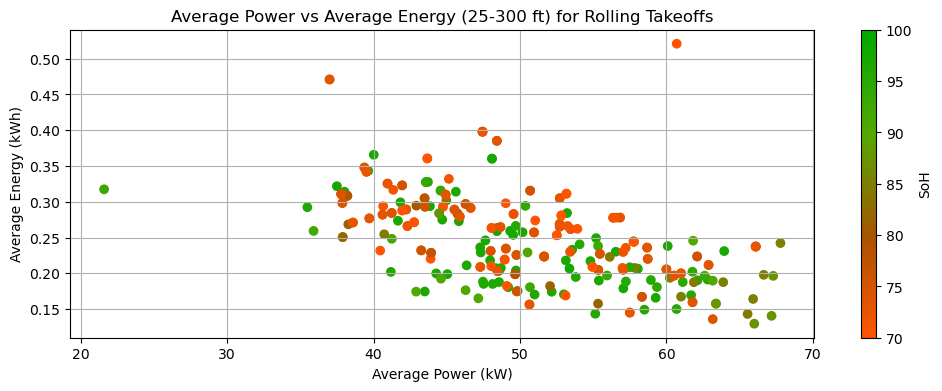

  SoH Bin  Slope Linear  R Linear  Slope Exponential  R Exponential
0   70-80     -0.004444 -0.532140          -0.017695      -0.567452
1   80-90     -0.003835 -0.788296          -0.018073      -0.772824
2  90-100     -0.003843 -0.533594          -0.015615      -0.520347
CPU times: total: 10 s
Wall time: 15.4 s


<timed exec>:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
<timed exec>:151: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.


In [52]:
%%time
cell_diff = 20
total_subfolders = len(subfolders)
plt.figure(figsize=(12, 4))

colors = [(1, 0.33, 0), (0.66, 0.33, 0), (0.33, 0.66, 0), (0, 0.66, 0)]  # Green to Blue
nodes = [0.0, 0.33, 0.66, 1.0] 
custom_colormap = mcolors.LinearSegmentedColormap.from_list("custom_colormap", list(zip(nodes, colors)))
norm = mcolors.Normalize(vmin=70, vmax=100)

slopes_ft_per_min = []
test = []
count = 0
df_slope = pd.DataFrame(columns=['Avg Power', 'Time', 'Average OAT', 'SoH'])

for i, subfolder in enumerate(subfolders):

    print(f"\rProcessing file {subfolder} [{round((i+1) / total_subfolders * 100)}%]", end='', flush = True)
    test = False
    standing = True
    initial_range = True
    start_index = 0
    end_index = 0
    takeoff_count = 0
    # Calculates the slope of cells 100 cells away from each other
    alt_diff = df_power["alt"][i].diff(periods=cell_diff)
    time_diff = df_power["time"][i].diff(periods=cell_diff)
    temp_alt_diff = df_power["alt"][i].diff(periods=10)
    alt_diff[temp_alt_diff < 0] = 0
    slope = alt_diff / time_diff 
    # Find the indices where slope is over 450
    high_slope_indices = slope[(abs(slope) > 400)].index
    plotted = False

    prev_mean = -100
    prev_start_idx = -100
    
    count_num = 1
    
    if not high_slope_indices.empty:
        # Plots the data inbtwn data sufficient slope
        
        full_alt_data = df_power["alt"][i]
        full_time_data = df_power["time"][i]
        full_power_data = df_power["kw"][i]
        time_alt_slope = -100
        
        for idx in high_slope_indices:
            
            start_idx = max(0, idx - cell_diff + 1)
            end_idx = min(len(df_power["alt"][i]), idx + 1)

            min_lim = 25
            max_lim = 300
            
            if df_power["time"][i][end_idx] < 5:
                continue
            
            if df_power["alt"][i][end_idx] < min_lim:
                continue
            
            if df_power["alt"][i][start_idx] > max_lim:
                continue
            
            if df_power["alt"][i][start_idx] < min_lim:
                if np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) == 0:
                    continue
                else:
                    start_idx = np.argmax(df_power["alt"][i][start_idx:end_idx] > min_lim) + start_idx


            if df_power["alt"][i][end_idx] > max_lim:
                end_idx = np.argmax(df_power["alt"][i] > max_lim)
                
            
            if start_idx >= end_idx:
                continue
            
            alt_data = df_power["alt"][i][start_idx:end_idx]
            alt_mean = alt_data.mean(skipna=True)
            time_data = df_power["time"][i][start_idx:end_idx]
            end_time = df_power["time"][i][end_idx]
            
            if alt_mean < prev_mean or np.isnan(alt_mean):
                if start_index + end_index > 0:
                    takeoff_count += 1
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                    
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 300 ft from 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1 and takeoff_count > count_num: #
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        plotted = True
                        initial_range = True
                
            if initial_range:
                start_index = start_idx
                if plotted:
                    prev_start_idx = start_index
                
                if df_power["alt"][i][start_index] == 0:
                    pass
                else:
                    initial_range = False
                
            
            end_index = end_idx
            prev_mean = alt_mean
            
        if start_index != prev_start_idx:
            if start_index + end_index > 0:
                takeoff_count += 1
                if takeoff_count > count_num:
                    start_index = df_power["alt"][i][start_index:end_index].idxmin()
                
                    diff_alt = full_alt_data[end_index]-full_alt_data[start_index]
                    diff_time = full_time_data[end_index]-full_time_data[start_index]
                    time_alt_slope = (diff_time/diff_alt) * 175 # Avg time to reach 175 ft
                    avg_power = full_power_data[start_index:end_index].mean()
                    oat = df_power["oat"][i][start_index:end_index].mean()
                    soh = df_power["soh"][i][start_index:end_index].mean()
                    if time_alt_slope < 1: #Eliminates Outliers
                        df_slope.loc[len(df_slope)] = {"Avg Power": avg_power, "Time": time_alt_slope, "Average OAT": oat, "SoH":soh }
                        # plt.plot(full_time_data[start_index:end_index], full_alt_data[start_index:end_index], color=colormap(i / total_subfolders))
                        initial_range = True
                                
  
print('')
print("Plotting...")

# Save this for later
plt.scatter(df_slope["Avg Power"], df_slope["Time"]*df_slope["Avg Power"]/60, marker='o', c=df_slope["SoH"], cmap=custom_colormap, norm=norm)
plt.colorbar(label='SoH', cmap=custom_colormap, norm=norm)

plt.xlabel('Average Power (kW)')
plt.ylabel('Average Energy (kWh)')
plt.title('Average Power vs Average Energy (25-300 ft) for Rolling Takeoffs')
plt.grid(True)
plt.show()

bins = [70, 80, 90, 100]
labels = ['70-80', '80-90', '90-100']

df_slope['SoH Bin'] = pd.cut(df_slope['SoH'], bins=bins, labels=labels, right=False)


slopes_and_corr = df_slope.groupby('SoH Bin').apply(calculate_slope_and_correlation).reset_index()

print(slopes_and_corr)

In [53]:
slopes_and_corrs = calculate_slope_and_correlation(df_slope)
print("General Slopes and Correlations:")
print(slopes_and_corrs)
print('')

General Slopes and Correlations:
Slope Linear        -0.004312
R Linear            -0.553335
Slope Exponential   -0.017784
R Exponential       -0.575638
dtype: float64

